<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f">Overall excellently done. Comprehensive ways of manipulating table format and presenting it in a clear direction. Commendable effort in researching for ways beyond the course's scope to present geospatial data in this report.<br><br>
Comments and codes could have been better spaced out for readability (aka use more space!!)<br><br>
        • Project Organisation: <b>Meet Portfolio Expectations</b> <br>
        • Python Syntax and Control Flow: <b>Meet Portfolio Expectations</b><br>
        • Data Cleaning and EDA: <b>Meet Portfolio Expectations</b><br>
        • Visualisations: <b>Meet Portfolio Expectations</b><br>
        • Research and Conceptual Understanding: <b>Meet Portfolio Expectations</b><br> 
    </font>
</div>

# Project 1: SAT and ACT Participation Analysis

## Problem Statement

How do we increase the participation rates of SAT college entrance exams for high school students? What are the states with high and low SAT and ACT participation rates? What kind of attributes do these states have that influences the participation rates? What kind of relationship does the participation rates of SAT and ACT have? What kind of relationship does the participation rates of the tests have with their respective average scores? 

## Executive Summary

We study the data of participation rates and average scores of high school students who take the  SAT and ACT standardised tests used for college extrance admissions. Data on participation rates and average test scores for each component of the test and the overall score is available for each US state.

The data shows trends that the test participation rates are influenced by state requirements for high school students to graduate. As colleges accept either test, students generally do not take both unless they are high performing students. Since SAT participation and ACT participation in a state shows an inverse relationship, selection bias results in participation rates and test scores to be negatively correlated as well.

Although the tests are not expensive, preparing for the tests may require significant effort and tutoring. Many students are not able to afford extensive tutoring. We can see a possible relationsip between students' financial situation and participation rates by comparing the states participation rates with the proportion of students taking the fee waiver. However, state economic indicators do not seem to show a strong correlation. Further studies may be necessary to tease out the differences.

### Contents:
- [Data Dictionary](#Data-Dictionary)
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualizations)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Libraries

> <font size = 3 color='red'>Tika isnt included in the standard anaconda distribution.</font>

In [4]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
from tika import parser   ###
import geopandas as gpd   ###
from scipy.stats import shapiro
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display_html
from sklearn import preprocessing
import shapely            ###
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The State that the relevant scores are associated with. Comprises the 50 US states and the federal District of Columbia|
|act_participation|float|ACT|Percentage of students participating in the ACT, to 2 decimal places, where 0.1 means 10%|
|act_eng|float|ACT|Average score of the English component of the ACT from 1 to 36|
|act_math|float|ACT|Average score of the Math component of the ACT from 1 to 36|
|act_reading|float|ACT|Average score of the Reading component of the ACT from 1 to 36|
|act_science|float|ACT|Average score of the Science component of the ACT from 1 to 36|
|act_composite|float|ACT|Average score of the Composite (i.e. average of all components) of the ACT from 1 to 36|
|sat_participation|float|SAT|Percentage of students participating in the SAT, to 2 decimal places, where 0.1 means 10%|
|sat_reading|int|SAT|Average score of the Evidence-based Reading and Writing component of the SAT from 200 to 800|
|sat_math|int|SAT|Average score of the Math component of the SAT from 200 to 800|
|sat_total|int|SAT|Total average score of both components of the SAT from 400 to 1600|
|sat_fee_waiver|float|SAT|Percentage of students who used the fee waiver for SAT|
|act_ratechange|float|ACT|Proportion of change of in participation rate between 2017 and 2018|
|sat_ratechange|float|SAT|Proportion of change of in participation rate between 2017 and 2018|
|partisanship_lean|float|Indicators|The political party that the state leans towards, expressed as a percentage with positive as favorable towards the Democratic Party|
|median_income|float|Indicators|Median income per household in dollars|
|gdp_per_capita|int|Indicators|State GDP per capita in 2018 in dollars.|
|gini_ineq|float|Indicators|Gini coefficient of income inequality for the state|
|drawseq|int|USA|Shapefile parameter for USA map display|
|state_fips|int|USA|Shapefile parameter for USA map display|
|sub_region|str|USA|Region of the USA where the state is in|
|state_abbr|str|USA|Abbreviation of the US state in two letters|
|geometry|str|USA|Shapefile polygon geometry for USA map display|
|coords|str|USA|Geometric centre of the polygon in the shapefile for text display|
|_year|(suffix)|ACT/SAT|Year of test participation/scores|

## 2017 Data Import and Cleaning

#### 1. Import data from csv

Data Sources: [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/) and [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

> <font size = 3 color = red> Best to use reference path instead of absolute path when naming a path variable<br>
    E.g. act2017 = pd.read_csv('<b>./</b>    data/act_2017.csv')</font>

In [2]:
#Code:
act2017 = pd.read_csv('data/act_2017.csv')
sat2017 = pd.read_csv('data/sat_2017.csv')

#### 2. SAT and ACT Participation and Scores by State in 2017

ACT data:

In [3]:
#Code:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


SAT data:

In [4]:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Data Description

The data contains the student participation rate for ACT and SAT, and the average score for each component of the standardised tests for each state. The ACT data also contains the national participation rate and average scores, as well as the average composite score (i.e. average of the student's scaled scores). The SAT data also contains the total score of the component tests.

#### 4a. Missing or Empty Values

Using the pandas info function, we can see that there are no null values for either ACT or SAT data, hence the data is complete.

> <font size = 3 color = red> For question 3, it will be helpful to also describe data characteristics, such as number of rows, shape, etc <br> Checking for null values is a good way to check for completeness</font>

In [5]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [6]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4b. Discrepancies in the data

To check for possible issues in the data, we should first understand how ACT and SAT scores are structured.<br>The SAT is scored from 400 to 1600; the minimum and maximum score for each component is 200 and 800 respectively. <br>The ACT is scored from 1 to 36 for each component and the composite score.

With these guidelines, we can examine the descriptive statistics of the SAT and ACT scores for the data.

##### Descriptive statistics of SAT and ACT scores in 2017

In [7]:
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


##### Errors in the data

According to the maximum and minimum values of the data below, the minimum average SAT score for math is 52. Since the lowest possible SAT score for each component is 200, this means there is an error in the data. Similarly, the minimum average score for science in the ACT data is 2.3, which seems unlikely. In the original datasets, the average SAT Math score for Maryland is 524, while the average ACT Science score for the same state is 23.2.

> <font size = 3 color=red>Good to include where you get the <b>original datasets</b> from in your explanation above.</font>

In [9]:
sat2017[sat2017['Math']==52] #filter datafreame to find row with Math==52

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [10]:
act2017[act2017['Science']==2.3] #filter datafreame to find row with Science==2.3

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix errors identified

In [11]:
#fix ACT error for Maryland
act2017.iloc[21,5]=23.2
act2017.iloc[21,5]

23.2

In [12]:
#fix SAT error for Maryland
sat2017.iloc[20,3]=524
sat2017['Math'].iloc[20]

524

#### 5a. Data Types

In [13]:
sat2017.dtypes #get data type for SAT data using dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
act2017.dtypes #get data type for ACT data using dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### 5b. Any other errors

In [15]:
#check data against another copy of ACT data copied from website into a text file
acttest = pd.read_csv('data/act2017test.txt',sep='\t')[:51] #load data
act_new = act2017[1:].reset_index(drop=True) #drop national average from original ACT data
#create dictionaries with the set of unique values for each column in both sets of ACT 2017 data 
acttest = {col:set(contents) for col, contents in acttest.iteritems()}
act_new = {col:set(contents) for col, contents in act_new.iteritems()}
#check where the datasets differ
print({key: act_new[key] == acttest[key] for key,value in acttest.items()})

{'State': True, 'Participation': True, 'English': True, 'Math': True, 'Reading': True, 'Science': True, 'Composite': False}


> <font size = 3 color = red> Works well for this time, but what if the true and false values are actually repeated values within the column? The comparison would return True in this case as well.<br><br>Additionally, same comment for the path variable. Use a relative path instead i.e. ./data/act2017test.txt</font>

In [16]:
for i in act_new['Composite']:
    try:
        float(i)
    except:
        print(f"The value {i} is not a number.") #look for the value in the Composite field that has an error

The value 20.2x is not a number.


In [17]:
#check data against another copy of SAT data copied from website into a text file
sattest = pd.read_csv('data/sat2017test.txt',sep='\t')[:51] #load data
sattest.columns = sat2017.columns #ensure same column names
#create dictionaries with the set of unique values for each column in both sets of ACT 2017 data 
sattest = {col:set(contents) for col, contents in sattest.iteritems()}
sat2017_set = {col:set(contents) for col, contents in sat2017.iteritems()}
#check where the datasets differ
print({key: sattest[key] == sat2017_set[key] for key,value in sattest.items()})

{'State': True, 'Participation': True, 'Evidence-Based Reading and Writing': True, 'Math': True, 'Total': True}


The Participation columns for both ACT and SAT data objects rather than numeric due to the '%' sign. The Composite column for ACT is also an object. ACT data has a data entry error for Wyoming, which was entered as 20.2x instead of 20.2, causing the values in the column to be stored as strings instead of a number type. No other errors were found for SAT data.

#### 6. Fix Incorrect Data Types
- Function to convert participation rates to an appropriate numeric type.

In [18]:
def percent2float(x): #define a function
    return float(x.strip('%'))/100
sat2017['Participation']=sat2017['Participation'].map(percent2float) # call the function on the columns using map
act2017['Participation']=act2017['Participation'].map(percent2float)

- Fix ACT error for Wyoming.

In [19]:
#replace x in composite score for Wyoming
act2017['Composite']=act2017['Composite'].str.replace("x","")
#change ACT Composite to numeric value
act2017['Composite'] = pd.to_numeric(act2017['Composite'])

- Check data columns.

In [20]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [21]:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Check data types.

In [22]:
print(act2017.dtypes,"\n")
print(sat2017.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object 

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


#### 7. Rename Columns

In [23]:
#lists of column names
act_names=['state','act_participation','act_eng','act_math','act_reading','act_science','act_composite']
sat_names=['state','sat_participation','sat_reading','sat_math','sat_total']
#change column names
act2017.columns=act_names
sat2017.columns=sat_names

<font size = 3 color = red>As the question indicated, 'no repeated singular name changes'.<br>You should try a function that loops through all column names and replace " " with "_"</font>

#### 8. Drop unnecessary rows

Since we are focusing on state level participation and scores, the national average for ACT data is not required. We can remove this using the pandas drop function. 

In [24]:
act2017 = act2017.drop(0,axis=0).reset_index(drop=True)
act2017.head()

,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 9. Merge Dataframes

Using the pandas merge function, we can join the 2017 ACT and SAT dataframes using the state in each dataframe as the key.

In [25]:
data2017 = pd.merge(act2017, sat2017,on='state')
data2017.head()

,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite,sat_participation,sat_reading,sat_math,sat_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 10. Other Data

Other than the basic information on participation rates and scores, there could be other useful information provided by the College Board. This section will detail the steps on how this information is collected and added to the data. First, we download pdfs of the SAT 2017 reports.

In [26]:
#create list of states, SAT reports use dashes('-'') instead of spaces(' ') in their urls and drops the 'of' in DC
states = [i.lower().replace(" of ","-").replace(" ","-") for i in data2017['state']]
print(states[:3])

['alabama', 'alaska', 'arizona']


In [ ]:
#create list of urls to access 2017 pdf reports
urls = ['https://reports.collegeboard.org/pdf/2017-'+state+'-sat-suite-assessments-annual-report.pdf' for state in states]
urls[:3]

In [ ]:
#download pdf reports using requests
for i in range(len(urls)): #loop through the urls
    myfile = requests.get(urls[i]) #get the data
    open('data/states2017sat/'+states[i]+'.pdf', 'wb').write(myfile.content) #write the data to a local folder

##### Fee Waiver rates

In [28]:
temp_lst = [] #empty list
for state in states:
    raw = parser.from_file('data/states2017sat/'+state+'.pdf') #parse pdf using tika
    #find section containing percentage of students using fee waiver with re and regular expression
    feewaiver = re.search('(?<=(Did not use))[\\n0-9%, ]*(?=(SAT Fee Waiver))', raw['content']).group(0) 
    temp_lst.append(feewaiver.split()[-3]) #append relevant percentage to temp_lst
print(temp_lst[:3]) #check the accuracy of the extracted data
data2017['sat_fee_waiver']=temp_lst#add temp_lst to 2017 data
data2017['sat_fee_waiver']=data2017['sat_fee_waiver'].map(percent2float)#change the fee waiver to proportion
data2017.head() #show the new dataframe

['14%', '11%', '19%']


,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite,sat_participation,sat_reading,sat_math,sat_total,sat_fee_waiver
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,0.14
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.11
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.19
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,0.14
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.45


#### 11. Save your cleaned, merged dataframe

In [ ]:
#code
data2017.to_csv('data/data2017.csv',index=False)

## 2018 Data Import and Cleaning

### 2018 Data Sources

The 2018 ACT data was obtained from [here](https://magoosh.com/hs/act/2016/average-act-score-by-state/) and [here](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf).
The 2018 SAT data was collected from [the pdfs archived on the collegeboard website](https://research.collegeboard.org/programs/sat/data/archived/2018-sat-suite-annual-report).
2019 SAT data is also available [here](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent).

#### 1. 2018 SAT data

First, we download the individual pdfs for each state where we can find the participation rates and scores.

In [ ]:
#create list of urls to access 2018 pdf reports
urls = ['https://reports.collegeboard.org/pdf/2018-'+state+'-sat-suite-assessments-annual-report.pdf' for state in states]
urls[:3]

In [ ]:
#download pdf reports using requests
for i in range(len(urls)): #loop through the urls
    myfile = requests.get(urls[i]) #get the data
    open('data/states2018sat/'+states[i]+'.pdf', 'wb').write(myfile.content) #write the data to a local folder

Next, we extract the relevant sections to build a new dataframe for 2018 SAT data.

In [29]:
#access pdf using tika's parser to extract text
#then build dictionary of state sat scores and participation using re (regular expressions)
sat2018dict = {}
for state in states:
    raw = parser.from_file('data/states2018sat/'+state+'.pdf') #parse pdf
    #extract section with participation rate
    participation_text = re.search('SAT Participation Rate[\\n0-9, ]*%', raw['content']).group(0)
    #extract participation rate
    participation = re.search('[0-9]*%', participation_text).group(0)
    #average score text
    score_text = re.search('Took Essay¹[\\n0-9% ,]*', raw['content']).group(0) #scores from string originally from table
    scores = score_text.split() #split the text by spaces, includes newlines
    #data required is in the 11th, 13th and 15th index, combine that with participation rate
    scores = {"Math":scores[11],"ERW":scores[13],"Total":scores[15],"Participation":participation}
    sat2018dict[state] = scores
print(len(sat2018dict))
for x in list(sat2018dict)[:3]:
    print ("{}: {} ".format(x,  sat2018dict[x]))

51
alabama: {'Math': '571', 'ERW': '595', 'Total': '1166', 'Participation': '6%'} 
alaska: {'Math': '544', 'ERW': '562', 'Total': '1106', 'Participation': '43%'} 
arizona: {'Math': '572', 'ERW': '577', 'Total': '1149', 'Participation': '29%'} 


> <font size = 3 color = red>Same comments. Relative pathhhhhhhhhhh</font>

In [30]:
#convert dictionary to dataframe
sat2018 = pd.DataFrame.from_dict(sat2018dict,orient='index')
sat2018['Participation']=sat2018['Participation'].map(percent2float) #run function to fix percentages
sat2018=sat2018.apply(pd.to_numeric) #change type to numeric values
sat2018=sat2018.reset_index(drop=True) #reset index from the state names to 0 index
sat2018['State']=data2017['state'] #add the state column
sat2018 = sat2018[["State","Participation","ERW","Math","Total"]] #rearrange columns
sat2018.columns=sat_names #rename columns
sat2018.head()

,state,sat_participation,sat_reading,sat_math,sat_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [31]:
#check data types
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                51 non-null object
sat_participation    51 non-null float64
sat_reading          51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [32]:
#check data stats
sat2018.describe()

,sat_participation,sat_reading,sat_math,sat_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.466275,567.294118,557.254902,1124.666667
std,0.380142,45.317676,48.887562,93.868561
min,0.020000,497.000000,480.000000,977.000000
25%,0.045000,535.000000,521.500000,1062.500000
50%,0.520000,552.000000,547.000000,1099.000000
75%,0.795000,616.500000,600.500000,1220.000000
max,1.000000,643.000000,655.000000,1298.000000


#### 2. 2018 ACT data

Since the 2018 ACT data is available in table form, we extract the information into csv and check for errors. Next, we read the csv file into a pandas dataframe.

In [33]:
act2018 = pd.read_csv('data/act_2018manual.csv') #get data from csv copied from table in the data source
#rearrange columns
act2018 = act2018[["State","Percentage of Students Tested","Average English Score","Average Math Score","Average Reading Score","Average Science Score","Average Composite Score"]]
act2018.columns = act_names #rename columns
act2018['act_participation']=act2018['act_participation']/100 #ensure consistency in data scale
act2018.head()

,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [34]:
act2018.info()#check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                51 non-null object
act_participation    51 non-null float64
act_eng              51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
act_composite        51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [35]:
act2018.describe()#check data stats

,act_participation,act_eng,act_math,act_reading,act_science,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### 3. Merge data for 2018

In [36]:
#Merge dataframes for 2018 data
data2018 = pd.merge(act2018, sat2018,on='state')
data2018.head()

,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite,sat_participation,sat_reading,sat_math,sat_total
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076


#### 4. Other Data

Collect other relevant information from SAT data or other sources.

##### Fee Waiver Rates

In [37]:
temp_lst = [] #empty list
for state in states:
    raw = parser.from_file('data/states2018sat/'+state+'.pdf') #parse pdf using tika
    #find section containing percentage of students using fee waiver with re and regular expression
    feewaiver = re.search('(?<=(Did not use))[\\n0-9%, ]*(?=(SAT Fee Waiver))', raw['content']).group(0) 
    temp_lst.append(feewaiver.split()[-3]) #append relevant percentage to temp_lst
print(temp_lst[:3])#check that percentage is correct
data2018['sat_fee_waiver']=temp_lst#add temp_lst to 2018 data
data2018['sat_fee_waiver']=data2018['sat_fee_waiver'].map(percent2float)#change the fee waiver to proportion
data2018.head()

['17%', '12%', '20%']


,state,act_participation,act_eng,act_math,act_reading,act_science,act_composite,sat_participation,sat_reading,sat_math,sat_total,sat_fee_waiver
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166,0.17
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106,0.12
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149,0.20
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169,0.12
4,California,0.27,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076,0.40


#### 5. Export 2018 data to csv 

In [38]:
data2018.to_csv('data/data2018.csv',index=False) #write 2018 data to csv

#### 5. Combine 2017 and 2018 data into a single dataframe

In [39]:
data_final = pd.merge(data2017,data2018,on='state',suffixes=('_2017','_2018')) #merge 2017 and 2018 data
data_final.head()

,state,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_reading_2017,sat_math_2017,...,act_eng_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018,sat_participation_2018,sat_reading_2018,sat_math_2018,sat_total_2018,sat_fee_waiver_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,18.9,18.3,19.6,19.0,19.1,0.06,595,571,1166,0.17
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,19.8,20.6,21.6,20.7,20.8,0.43,562,544,1106,0.12
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,18.2,19.4,19.5,19.2,19.2,0.29,577,572,1149,0.20
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,19.1,18.9,19.7,19.4,19.4,0.05,592,576,1169,0.12
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,22.5,22.5,23.0,22.1,22.7,0.60,540,536,1076,0.40


In [40]:
data_final.to_csv('data/final.csv', index=False) #output final dataset to csv

#### 8. Other data points

This subsection collects other data points and creates calculated fields from the available data for use.

##### Change in participation rates

In [41]:
#change in participation rates for ACT and SAT
data_final['act_ratechange'] = (data_final['act_participation_2018']-data_final['act_participation_2017'])/data_final['act_participation_2017']
data_final['sat_ratechange'] = (data_final['sat_participation_2018']-data_final['sat_participation_2017'])/data_final['sat_participation_2017']

##### State Economic Indicators and Political Party Affiliation
The state [political party lean](https://en.wikipedia.org/wiki/Cook_Partisan_Voting_Index), state [Median Income](https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls), [Per Capita GDP](https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP_per_capita) and [Gini coefficient of income inequality by state](https://en.wikipedia.org/wiki/List_of_U.S._states_by_Gini_coefficient) was compiled to csv.

In [42]:
indicators = pd.read_csv('data/state_indicators.csv')
indicators['partisanship_lean']=indicators['partisanship_lean']/100
data_final = pd.merge(data_final,indicators, on='state')
data_final.shape

(51, 30)

#### 7. Preparation of GeoDataFrame

It may be easier to show the information for states geographically rather than alphabetically in some cases. Thus, we read a [base map shapefile available on the Esri website](https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5) to display maps and join it with the SAT and ACT data.

In [43]:
#read USA shapefile with GeoPandas, rename columns
usa = gpd.read_file("states_21basic/states.shp")
usa.columns = ['state','drawseq','state_fips','sub_region','state_abbr','geometry']
usa.columns
usa.head()

,state,drawseq,state_fips,sub_region,state_abbr,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [44]:
#use shapely to get geometric centre of polygons for map annotation
usa['coords'] = usa['geometry'].apply(lambda x: x.representative_point().coords[:]) 
usa['coords'] = [coords[0] for coords in usa['coords']]
usa.head()

,state,drawseq,state_fips,sub_region,state_abbr,geometry,coords
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...","(-155.41377166070492, 19.584106345703862)"
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...","(-119.72177283941517, 47.27282087149099)"
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...","(-109.34142035805476, 46.67901437093796)"
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...","(-69.16275593567602, 45.25179136960876)"
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...","(-100.45330405371908, 47.481078371684944)"


In [45]:
#join geodataframe with SAT and ACT data
usa = pd.merge(usa,data_final, on='state')
usa.head(3)

,state,drawseq,state_fips,sub_region,state_abbr,geometry,coords,act_participation_2017,act_eng_2017,act_math_2017,...,sat_math_2018,sat_total_2018,sat_fee_waiver_2018,act_ratechange,sat_ratechange,median_income_2018,median_income_2017,gdp_per_capita,gini_ineq,partisanship_lean
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...","(-155.41377166070492, 19.584106345703862)",0.90,17.8,19.2,...,549,1099,0.24,-0.011111,0.018182,80108,75369,64096,0.4420,-0.19
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...","(-119.72177283941517, 47.27282087149099)",0.29,20.9,21.9,...,538,1081,0.14,-0.172414,0.078125,79726,77256,74182,0.4591,-0.19
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...","(-109.34142035805476, 46.67901437093796)",1.00,19.0,20.2,...,592,1198,0.05,0.000000,0.000000,57679,60527,46609,0.4667,-0.14


In [46]:
#add state abbreviation to data
state_abbr = usa[['state','state_abbr']]
data_final = pd.merge(data_final,state_abbr, on='state')
data_final.head()

,state,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_reading_2017,sat_math_2017,...,sat_total_2018,sat_fee_waiver_2018,act_ratechange,sat_ratechange,median_income_2018,median_income_2017,gdp_per_capita,gini_ineq,partisanship_lean,state_abbr
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,1166,0.17,0.000000,0.200000,49936,52359,45219,0.4847,-0.14,AL
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,1106,0.12,-0.492308,0.131579,68734,73992,73205,0.4081,-0.09,AK
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,1149,0.20,0.064516,-0.033333,62283,62615,48055,0.4713,-0.05,AZ
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,1169,0.12,0.000000,0.666667,49781,50019,42454,0.4719,-0.15,AR
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,1076,0.40,-0.129032,0.132075,70489,71459,74205,0.4899,0.12,CA


## Exploratory Data Analysis


### Summary Statistics

We can show the descriptive statistics of the dataset with the describe function. The standard deviation is one of the values available.

In [47]:
descriptive_stats = data_final.describe().transpose()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,0.652549,0.321408,0.080000,0.310000,0.690000,1.0000,1.000000
act_eng_2017,51.0,20.931373,2.353677,16.300000,19.000000,20.700000,23.3000,25.500000
act_math_2017,51.0,21.182353,1.981989,18.000000,19.400000,20.900000,23.1000,25.300000
act_reading_2017,51.0,22.013725,2.067271,18.100000,20.450000,21.800000,24.1500,26.000000
act_science_2017,51.0,21.450980,1.739353,18.200000,19.950000,21.300000,23.2000,24.900000
act_composite_2017,51.0,21.519608,2.020695,17.800000,19.800000,21.400000,23.6000,25.500000
sat_participation_2017,51.0,0.398039,0.352766,0.020000,0.040000,0.380000,0.6600,1.000000
sat_reading_2017,51.0,569.117647,45.666901,482.000000,533.500000,559.000000,613.0000,644.000000
sat_math_2017,51.0,556.882353,47.121395,468.000000,523.500000,548.000000,599.0000,651.000000
sat_total_2017,51.0,1126.098039,92.494812,950.000000,1055.500000,1107.000000,1212.0000,1295.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- We write a function to calculate the standard deviation

In [49]:
def std_dev(x): #where x is a list/array/series
        return np.mean([(x[i]-np.mean(x))**2 for i in range(len(x))])**0.5

- Then we apply this function to each numeric column in the dataframe 

In [50]:
# 1. Drop the columns with dtype of object and apply function
# 2. Get the column name and contents with items method
# 3. Use dict comprehension to build dictionary
sd  = {index: value for index, value in (data_final.drop(['state','state_abbr'],axis=1).apply(std_dev)).items()}
sd

{'act_participation_2017': 0.31824175751231804,
 'act_eng_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 1.7222161451443672,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_2017': 0.3492907076664507,
 'sat_reading_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485504,
 'sat_total_2017': 91.58351056778743,
 'sat_fee_waiver_2017': 0.10430672245400342,
 'act_participation_2018': 0.3374519488199751,
 'act_eng_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538,
 'act_composite_2018': 2.0855261815801143,
 'sat_participation_2018': 0.3763965409204986,
 'sat_reading_2018': 44.871185617623894,
 'sat_math_2018': 48.405899469194466,
 'sat_total_2018': 92.94372462792965,
 'sat_fee_waiver_2018': 0.09404163597271398,
 'act_ratechange': 0.16179602716540528,
 'sat_ratechange': 1.7497175532037728,
 'median_in

The standard deviation from the self defined function is 0.99% smaller than the standard deviation from the pandas `describe` method but the same as the numpy's `std` method. This is likely because pandas uses the unbiased estimator (N-1 in the denominator), whereas the self defined function and Numpy (by default) does not.

In [51]:
#Get the proportion difference in the values of the standard deviations
std_diff = round((descriptive_stats['std'] - [val for key, val in sd.items()])/descriptive_stats['std'],4)
std_diff

act_participation_2017    0.0099
act_eng_2017              0.0099
act_math_2017             0.0099
act_reading_2017          0.0099
act_science_2017          0.0099
act_composite_2017        0.0099
sat_participation_2017    0.0099
sat_reading_2017          0.0099
sat_math_2017             0.0099
sat_total_2017            0.0099
sat_fee_waiver_2017       0.0099
act_participation_2018    0.0099
act_eng_2018              0.0099
act_math_2018             0.0099
act_reading_2018          0.0099
act_science_2018          0.0099
act_composite_2018        0.0099
sat_participation_2018    0.0099
sat_reading_2018          0.0099
sat_math_2018             0.0099
sat_total_2018            0.0099
sat_fee_waiver_2018       0.0099
act_ratechange            0.0099
sat_ratechange            0.0099
median_income_2018        0.0099
median_income_2017        0.0099
gdp_per_capita            0.0099
gini_ineq                 0.0099
partisanship_lean         0.0099
Name: std, dtype: float64

In [52]:
#Get the standard deviations with numpy's std method
data_npstd = {colname:np.std(contents) for colname, contents in data_final.drop(['state','state_abbr'],axis=1).iteritems()}
data_npstd

{'act_participation_2017': 0.3182417575123181,
 'act_eng_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2017': 0.3492907076664507,
 'sat_reading_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'sat_fee_waiver_2017': 0.10430672245400341,
 'act_participation_2018': 0.33745194881997503,
 'act_eng_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_2018': 2.0855261815801147,
 'sat_participation_2018': 0.3763965409204987,
 'sat_reading_2018': 44.87118561762388,
 'sat_math_2018': 48.40589946919447,
 'sat_total_2018': 92.94372462792965,
 'sat_fee_waiver_2018': 0.09404163597271396,
 'act_ratechange': 0.1617960271654053,
 'sat_ratechange': 1.749717553203773,
 'median_income_2

#### Trends and Patterns

The states with very low SAT participation rates are also the states with very high ACT participation rates. However, the same states with low SAT participation rates also have higher average Total SAT scores. This is likely because of some state governments having agreements with the ACT to act as standardized testing for high school graduands. As most colleges accept either the ACT or SAT, only the high performing students would take both to improve their chances of admission to a top college.

#### SAT Participation Rates by States

In [53]:
#data tables for different datasets
x = data_final.sort_values('sat_participation_2017',ascending=False)[['state','sat_participation_2017','sat_total_2017']].head()
y = data_final.sort_values('sat_participation_2018',ascending=False)[['state','sat_participation_2018','sat_total_2018']].head()

#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 SAT Participation Top 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 SAT Participation Top 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,sat_participation_2017,sat_total_2017
8,District of Columbia,1,950
22,Michigan,1,1005
6,Connecticut,1,1041
7,Delaware,1,996
29,New Hampshire,0.96,1052
,state,sat_participation_2018,sat_total_2018
5,Colorado,1,1025
6,Connecticut,1,1053
7,Delaware,1,998
22,Michigan,1,1011


In [54]:
#data tables for different datasets
x = data_final.sort_values('sat_participation_2017')[['state','sat_participation_2017','sat_total_2017']].head()
y = data_final.sort_values('sat_participation_2018')[['state','sat_participation_2018','sat_total_2018']].head()

#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 SAT Participation Bottom 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 SAT Participation Bottom 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,sat_participation_2017,sat_total_2017
34,North Dakota,0.02,1256
24,Mississippi,0.02,1242
15,Iowa,0.02,1275
25,Missouri,0.03,1271
44,Utah,0.03,1238
,state,sat_participation_2018,sat_total_2018
34,North Dakota,0.02,1283
50,Wyoming,0.03,1257
41,South Dakota,0.03,1241
27,Nebraska,0.03,1252


#### ACT Participation Rates by States

In [55]:
#data tables for different datasets
x = data_final.sort_values('act_participation_2017',ascending=False)[['state','act_participation_2017','act_composite_2017']].head()
y = data_final.sort_values('act_participation_2017',ascending=False)[['state','act_participation_2018','act_composite_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 ACT Participation Top 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 ACT Participation Top 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,act_participation_2017,act_composite_2017
0,Alabama,1,19.2
17,Kentucky,1,20
49,Wisconsin,1,20.5
44,Utah,1,20.3
42,Tennessee,1,19.8
,state,act_participation_2018,act_composite_2018
0,Alabama,1,19.1
17,Kentucky,1,20.2
49,Wisconsin,1,20.5
44,Utah,1,20.4


In [56]:
#data tables for different datasets
x = data_final.sort_values('act_participation_2017')[['state','act_participation_2017','act_composite_2017']].head()
y = data_final.sort_values('act_participation_2017')[['state','act_participation_2018','act_composite_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 ACT Participation Bottom 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 ACT Participation Bottom 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,act_participation_2017,act_composite_2017
19,Maine,0.08,24.3
29,New Hampshire,0.18,25.5
7,Delaware,0.18,24.1
39,Rhode Island,0.21,24
38,Pennsylvania,0.23,23.7
,state,act_participation_2018,act_composite_2018
19,Maine,0.07,24
29,New Hampshire,0.16,25.1
7,Delaware,0.17,23.2
39,Rhode Island,0.15,24.2


#### Participation in both ACT and SAT

Although students in most states take either the ACT or the SAT, there are a few states with more than 50% participation in both.

In [57]:
#data tables for different datasets
x = data_final[(data_final.act_participation_2017>0.5)&(data_final.sat_participation_2017>0.5)][['state','act_participation_2017','sat_participation_2017']]
y = data_final[(data_final.act_participation_2018>0.5)&(data_final.sat_participation_2018>0.5)][['state','act_participation_2017','sat_participation_2017']]
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('States with >50% Participation in both ACT and SAT in 2017')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('States with >50% Participation in both ACT and SAT in 2018')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,act_participation_2017,sat_participation_2017
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.9,0.55
,state,act_participation_2017,sat_participation_2017
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.9,0.55
33,North Carolina,1,0.49
40,South Carolina,1,0.5


#### SAT Scores by States

<font size = 3 color = red>Might be better for your report presentation to remove the participation rates for both SAT and ACT score rankings, since the task now is to just display the top 5 and bottom 5 states </font>

In [58]:
#data tables for different datasets
x = data_final.sort_values('sat_total_2017',ascending=False)[['state','sat_participation_2017','sat_total_2017']].head()
y = data_final.sort_values('sat_total_2018',ascending=False)[['state','sat_participation_2018','sat_total_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 SAT Scores Top 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 SAT Scores Top 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,sat_participation_2017,sat_total_2017
23,Minnesota,0.03,1295
49,Wisconsin,0.03,1291
15,Iowa,0.02,1275
25,Missouri,0.03,1271
16,Kansas,0.04,1260
,state,sat_participation_2018,sat_total_2018
23,Minnesota,0.04,1298
49,Wisconsin,0.03,1294
34,North Dakota,0.02,1283
15,Iowa,0.03,1265


In [59]:
#data tables for different datasets
x = data_final.sort_values('sat_total_2017')[['state','sat_participation_2017','sat_total_2017']].head()
y = data_final.sort_values('sat_total_2018')[['state','sat_participation_2018','sat_total_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 SAT Scores Bottom 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 SAT Scores Bottom 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,sat_participation_2017,sat_total_2017
8,District of Columbia,1,950
7,Delaware,1,996
12,Idaho,0.93,1005
22,Michigan,1,1005
19,Maine,0.95,1012
,state,sat_participation_2018,sat_total_2018
8,District of Columbia,0.92,977
7,Delaware,1,998
48,West Virginia,0.28,999
12,Idaho,1,1001


#### ACT Scores by States

In [60]:
#data tables for different datasets
x = data_final.sort_values('act_composite_2017',ascending=False)[['state','act_participation_2017','act_composite_2017']].head()
y = data_final.sort_values('act_composite_2018',ascending=False)[['state','act_participation_2018','act_composite_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 ACT Scores Top 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 ACT Scores Top 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,act_participation_2017,act_composite_2017
29,New Hampshire,0.18,25.5
21,Massachusetts,0.29,25.4
6,Connecticut,0.31,25.2
19,Maine,0.08,24.3
8,District of Columbia,0.32,24.2
,state,act_participation_2018,act_composite_2018
6,Connecticut,0.26,25.6
21,Massachusetts,0.25,25.5
29,New Hampshire,0.16,25.1
32,New York,0.27,24.5


In [61]:
#data tables for different datasets
x = data_final.sort_values('act_composite_2017')[['state','act_participation_2017','act_composite_2017']].head()
y = data_final.sort_values('act_composite_2018')[['state','act_participation_2018','act_composite_2018']].head()
#use display_html from IPython.display to show tables on the same row, set a caption to differentiate them
x_styler = x.style.set_table_attributes("style='display:inline'").set_caption('2017 ACT Scores Bottom 5 States')
y_styler = y.style.set_table_attributes("style='display:inline'").set_caption('2018 ACT Scores Bottom 5 States')
display_html(x_styler._repr_html_()+y_styler._repr_html_(), raw=True)

,state,act_participation_2017,act_composite_2017
28,Nevada,1,17.8
24,Mississippi,1,18.6
40,South Carolina,1,18.7
11,Hawaii,0.9,19
33,North Carolina,1,19.1
,state,act_participation_2018,act_composite_2018
28,Nevada,1,17.7
40,South Carolina,1,18.3
24,Mississippi,1,18.6
11,Hawaii,0.89,18.9


#### Changes in 100% Participation

Changes in socio-economic trends or policy may cause changes in participation rates. We can find the states which had 100% participation in only one year but not both by finding the intersection of the states with 100% participation in both years.

<font size = 3 color = red>No need to define custom function for intersection<br>
    There is already an inbuilt function in Python (for Set objects). Check out <b>Python Intersection() function</b><br>Unfortunately there is no predefined function for the complement of the sets. So you have to D.I.Y.</font>

In [62]:
#Filter to get pandas series of states with 100% participation in ACT and SAT for 2017 and 2018 
act_2017_max = data_final[data_final.act_participation_2017==1.0]['state']
act_2018_max = data_final[data_final.act_participation_2018==1.0]['state']
sat_2017_max = data_final[data_final.sat_participation_2017==1.0]['state']
sat_2018_max = data_final[data_final.sat_participation_2018==1.0]['state']

#function to get intersection of lists/arrays/series
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))

#get states with 100% participation in both years for ACT
max_act = intersection(act_2017_max,act_2018_max)
#get states with 100% participation in only one year for ACT
max_act_change = [i for i in act_2017_max if i not in max_act] + [i for i in act_2018_max if i not in max_act]
print(f"The states with 100% participation for ACT in only one year are:\n\
        {max_act_change}.")

#get states with 100% participation in both years for SAT
max_sat = intersection(sat_2017_max,sat_2018_max)
#get states with 100% participation in only one year for SAT
max_sat_change = [i for i in sat_2017_max if i not in max_sat] + [i for i in sat_2018_max if i not in max_sat]
print(f"The states with 100% participation for SAT in only one year are:\n\
        {max_sat_change}.")

The states with 100% participation for ACT in only one year are:
        ['Colorado', 'Minnesota', 'Nebraska', 'Ohio'].
The states with 100% participation for SAT in only one year are:
        ['District of Columbia', 'Colorado', 'Idaho'].


Among the states who had 100% participation in ACT for only one year, Nebraska and Ohio saw increases of 16% and 25%, Minnesota had a slight decrease of 1% and Colorado had a decrease of 70%. For changes in SAT participation, Idaho and District of Columbia changes less than 10%, while Colorado saw it's participation rate jump from 11% to 100%. This change is due to the [Colorado's state government requiring high school juniors to take the SAT instead of the ACT from 2017](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/) onwards.

In [63]:
change = data_final[['state','act_participation_2017','act_participation_2018','sat_participation_2017','sat_participation_2018']]
change[change.state.isin(max_act_change+max_sat_change)]

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
5,Colorado,1.00,0.30,0.11,1.00
8,District of Columbia,0.32,0.32,1.00,0.92
12,Idaho,0.38,0.36,0.93,1.00
23,Minnesota,1.00,0.99,0.03,0.04
27,Nebraska,0.84,1.00,0.03,0.03
35,Ohio,0.75,1.00,0.12,0.18


## Visualizations

#### Heatmap showing correlations between all numeric features

<font size = 3 color = red>Very good colour and size selection for heatmap</font>

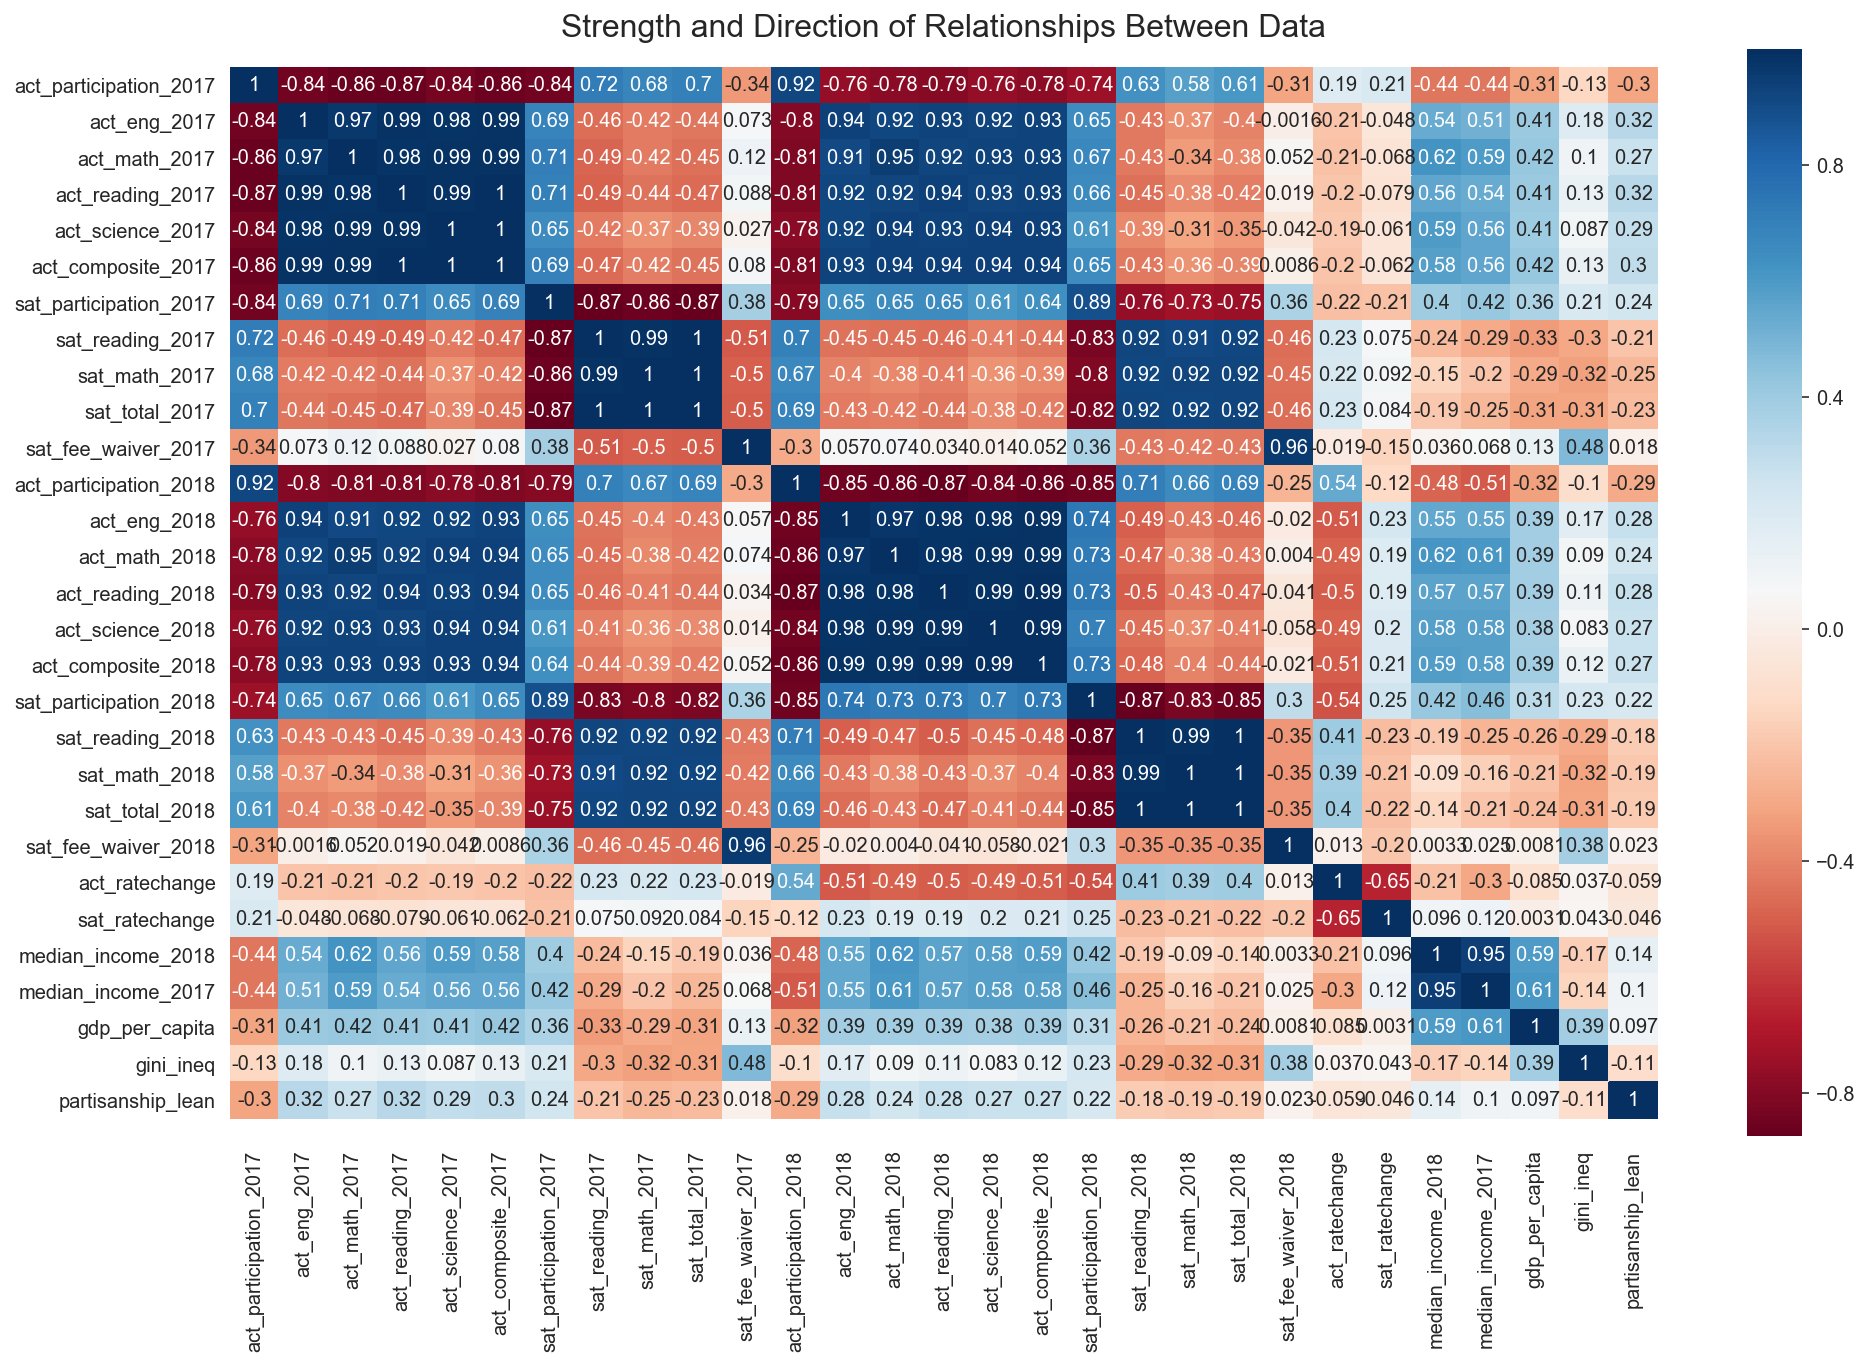

In [64]:
fig, ax = plt.subplots(1,figsize=(16,10));
sns.heatmap(data=data_final.corr(), ax=ax,cmap='RdBu',annot=True);
ax.set_title('Strength and Direction of Relationships Between Data',fontsize='16');
ax.set_ylim(len(data_final.corr())+0.5, -0.5);

#### Histograms of ACT and SAT data

We explore the shape of the distributions in the data by plotting histograms. First, we define a function to plot multiple histogram subplots.  

In [65]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, binsize):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=binsize) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_ylabel('No. of States')
        ax[i].set_xlabel(list_of_xlabels[i])
    plt.tight_layout()

##### Participation rates for SAT and ACT

The histograms of the participation rates between the two years suggest that there is a number of states which are consistently high in ACT participation and low in SAT participation. 

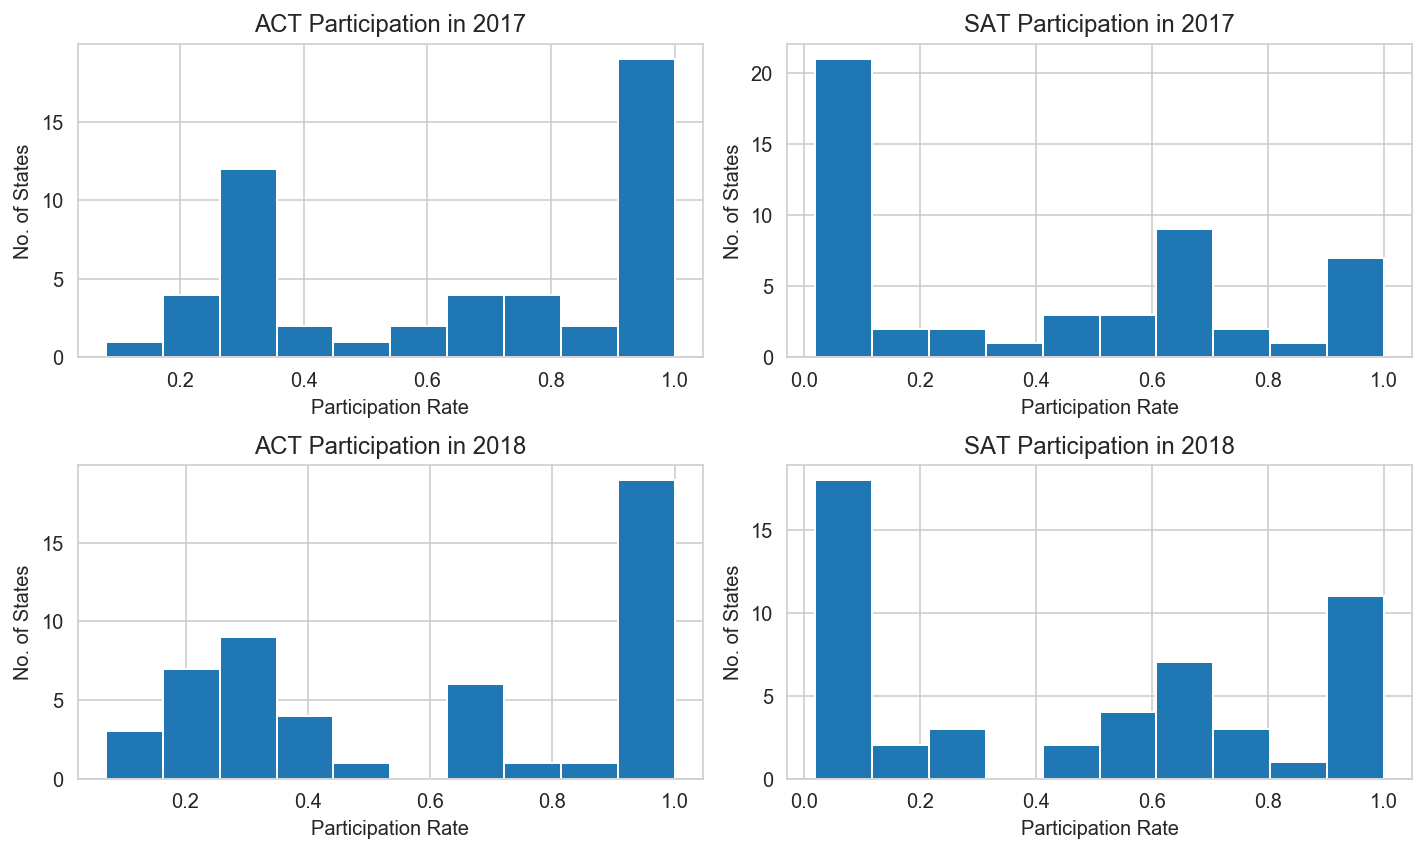

In [66]:
subplot_histograms(data_final,
                   ['act_participation_2017','sat_participation_2017','act_participation_2018','sat_participation_2018'],
                   ['ACT Participation in 2017','SAT Participation in 2017','ACT Participation in 2018','SAT Participation in 2018'],
                   ['Participation Rate']*4,10)

##### Math Scores for SAT and ACT

The histograms of the math scores suggest that there is unlikely to be a significant difference in the shape of the distribution of math scores between SAT and ACT as well as between the two years.

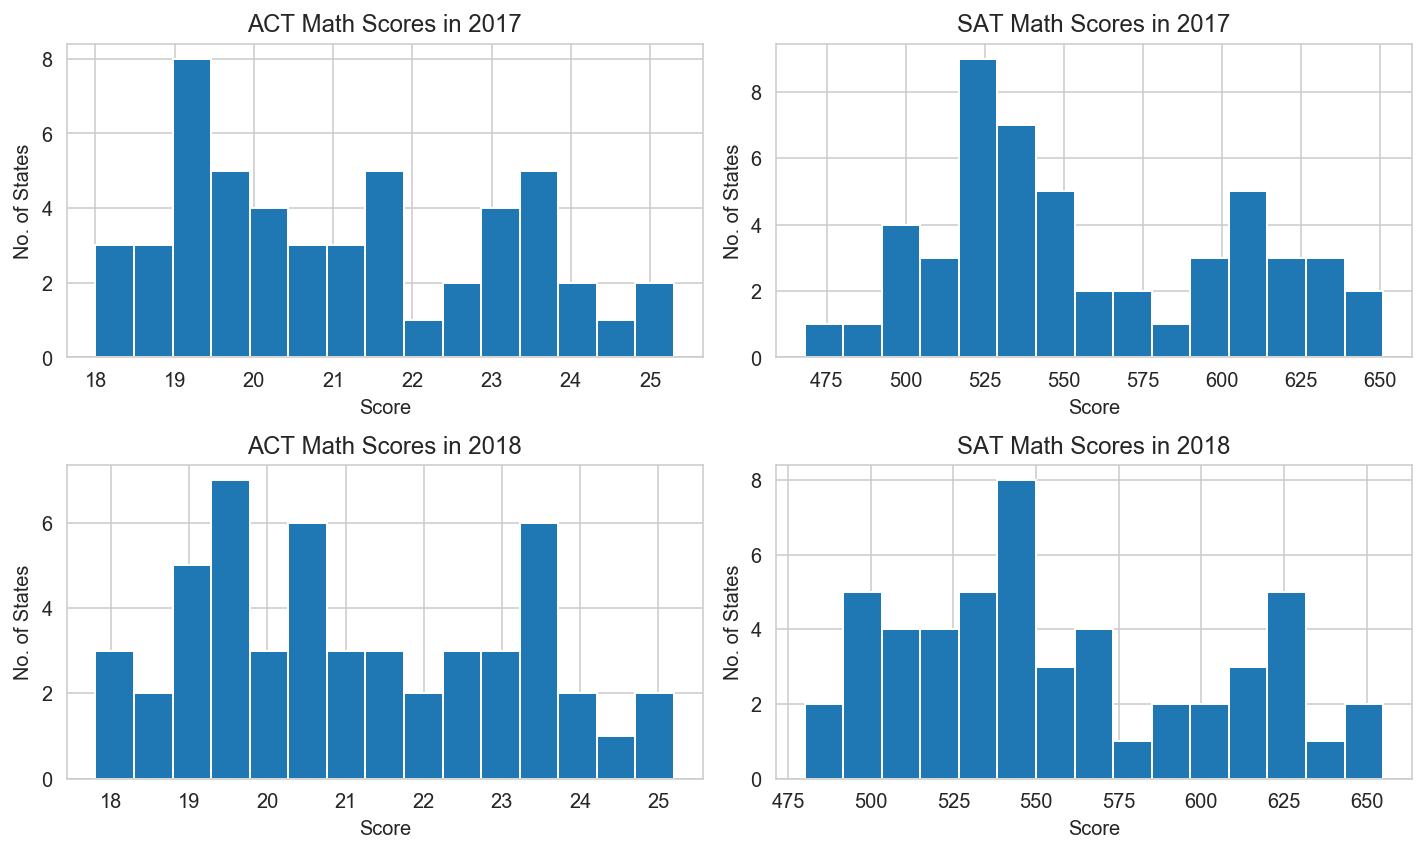

In [67]:
subplot_histograms(data_final,
                   ['act_math_2017','sat_math_2017','act_math_2018','sat_math_2018'],
                   ['ACT Math Scores in 2017','SAT Math Scores in 2017','ACT Math Scores in 2018','SAT Math Scores in 2018'],
                   ['Score']*6,15)

##### Reading/Verbal Scores for SAT and ACT

Similar to math scores, the histograms of the scores in the reading and verbal components of the tests does not seem to have significant differences between test type or years.

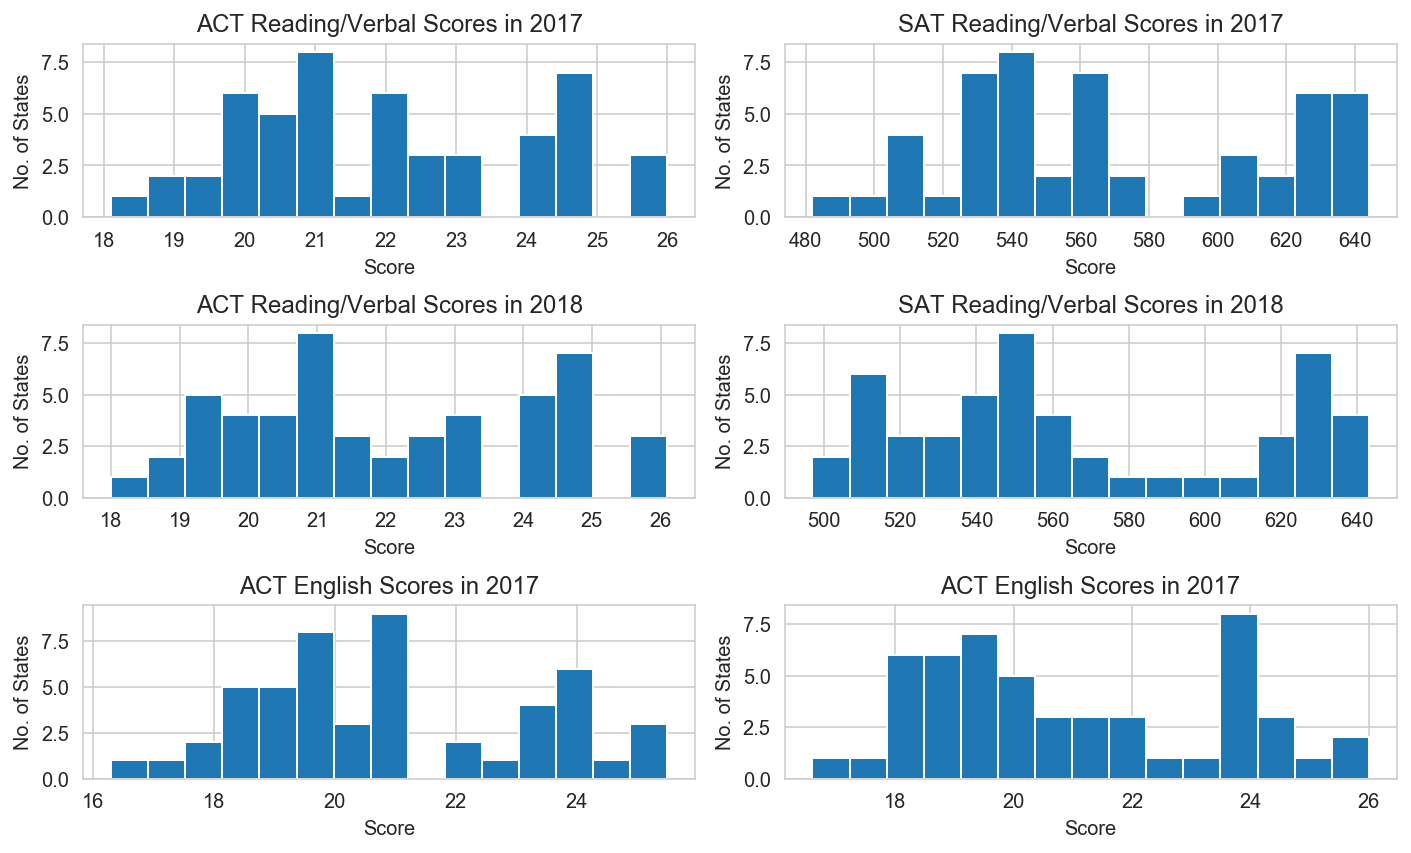

In [68]:
subplot_histograms(data_final,
                   ['act_reading_2017','sat_reading_2017','act_reading_2018','sat_reading_2018','act_eng_2017','act_eng_2018'],
                   ['ACT Reading/Verbal Scores in 2017','SAT Reading/Verbal Scores in 2017','ACT Reading/Verbal Scores in 2018','SAT Reading/Verbal Scores in 2018','ACT English Scores in 2017','ACT English Scores in 2017'],
                   ['Score']*6,15)

#### Scatter plots

This section builds scatter plots of different variables using seaborn's pairplot. The results below show that within each test (e.g. SAT Math vs SAT Reading/Verbal Scores) the scores are positively correlated. The same holds true when compared by year. However, between tests, the scores are negatively correlated, although the strength of the correlations are not necessarily strong.

In [69]:
# pairplot creates mirror images which can be confusing, this function is used to hide axes
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False) 

##### Comparison of SAT and ACT Math and Reading/Verbal Scores in 2017 

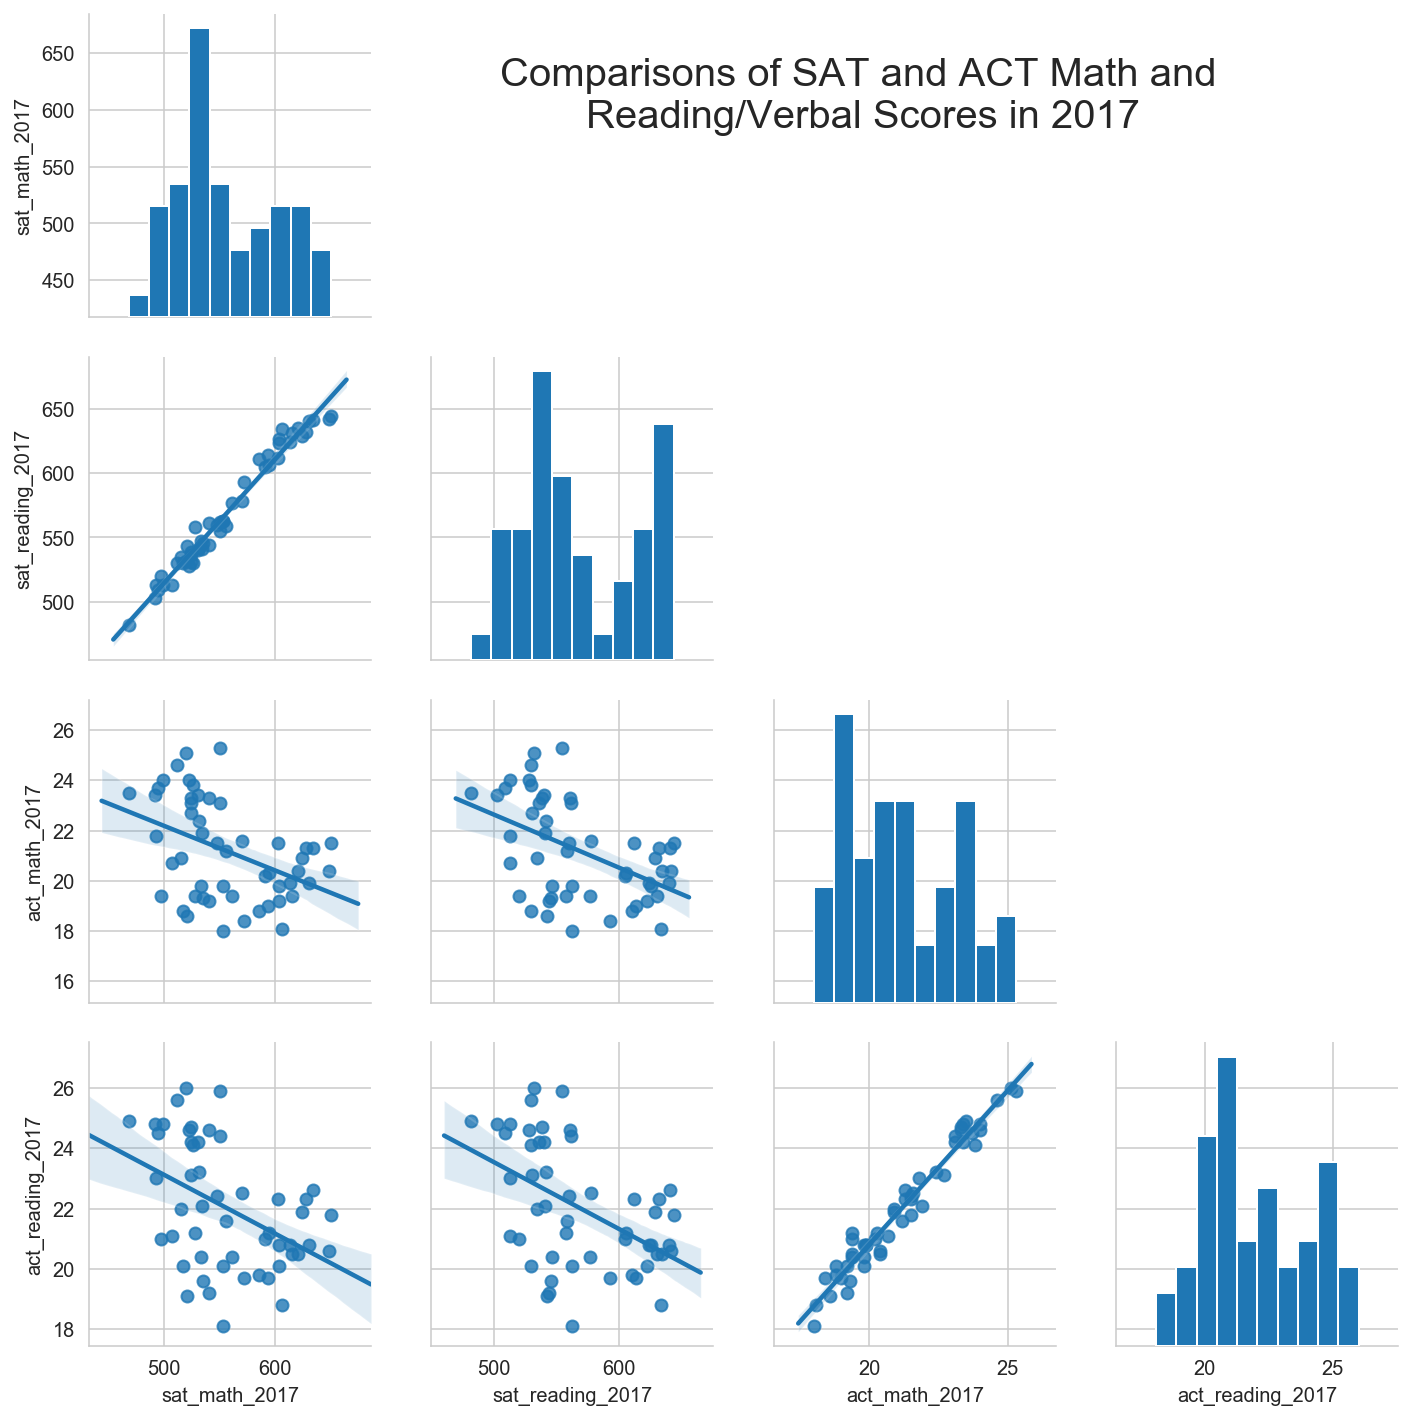

In [70]:
#plot pairwise comparison of scatter plots, with regression line
g = sns.pairplot(data_final[['sat_math_2017','sat_reading_2017','act_math_2017','act_reading_2017']],kind='reg') 
g.map_upper(hide_current_axis);
g.fig.suptitle("Comparisons of SAT and ACT Math and \nReading/Verbal Scores in 2017", x=0.6,y=0.95,fontsize='20');

##### Comparison of SAT and ACT Math and Reading/Verbal Scores in 2018

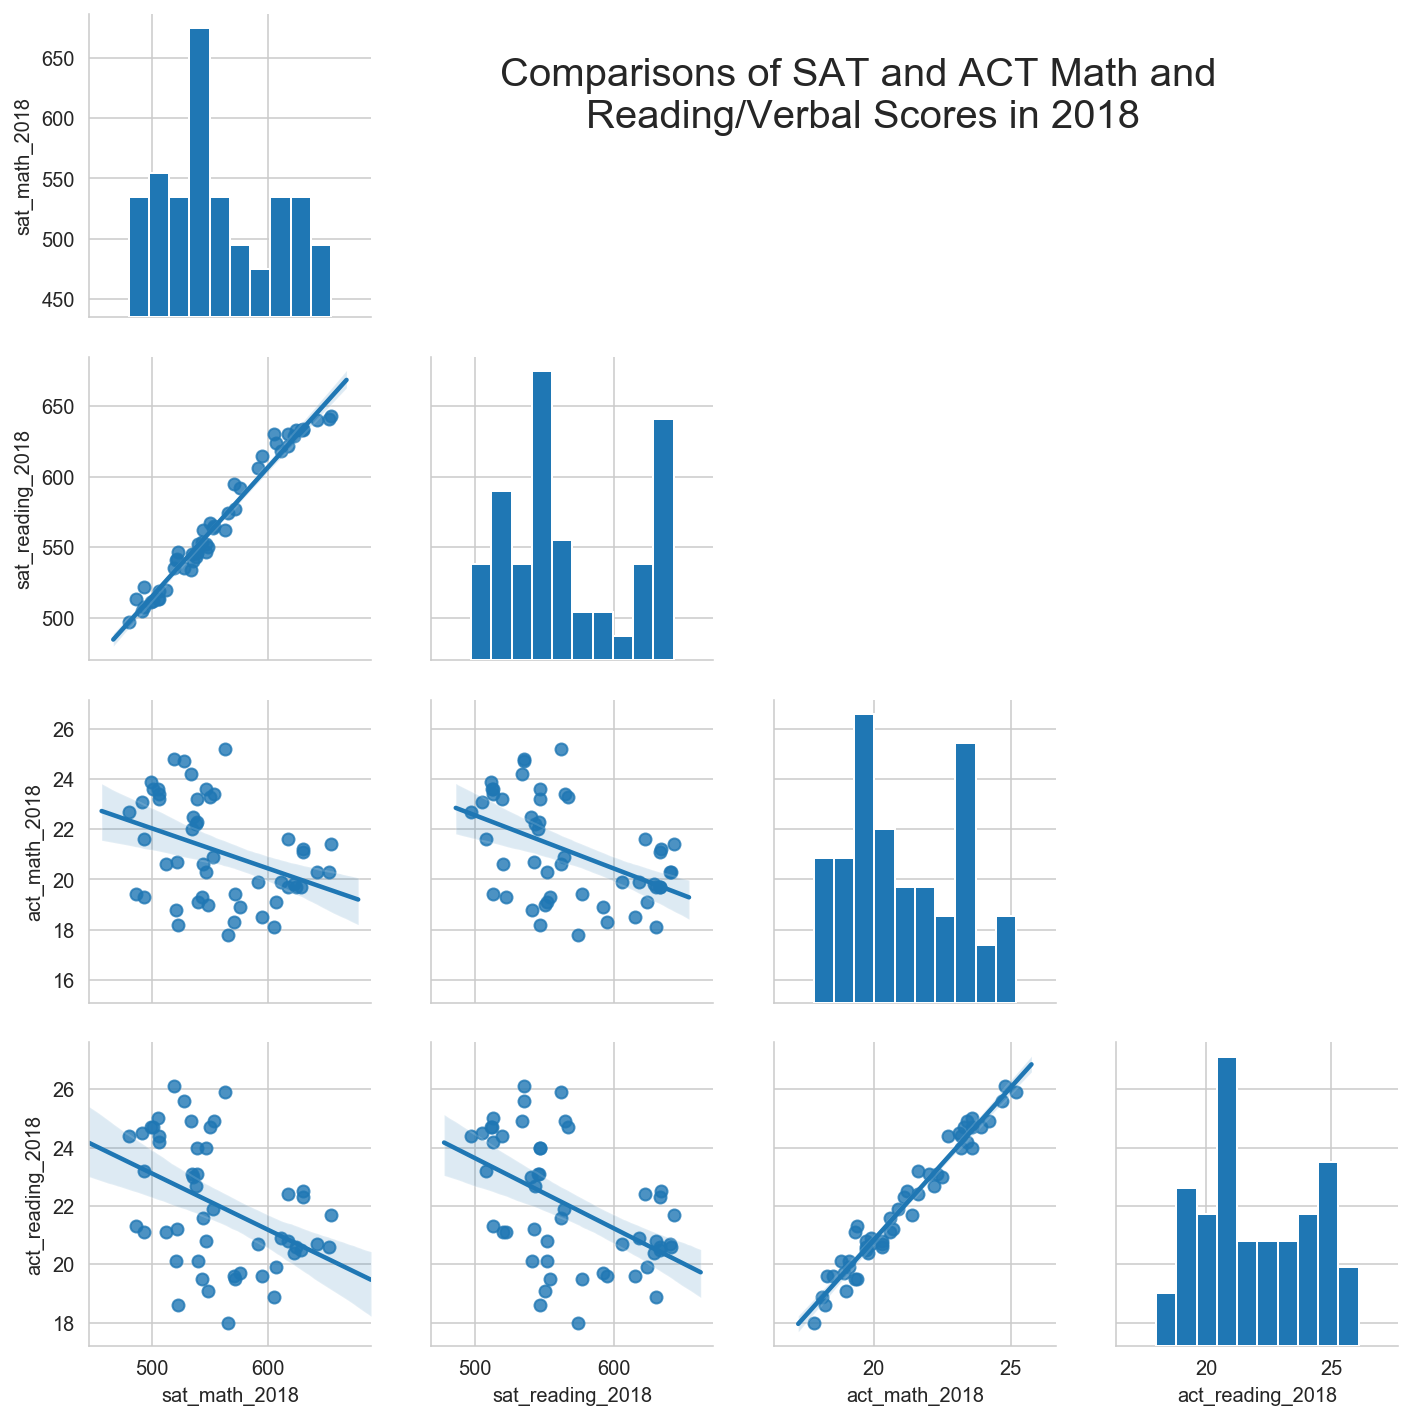

In [71]:
#plot pairwise comparison of scatter plots, with regression line
g = sns.pairplot(data_final[['sat_math_2018','sat_reading_2018','act_math_2018','act_reading_2018']],kind='reg') 
g.map_upper(hide_current_axis);
g.fig.suptitle("Comparisons of SAT and ACT Math and \nReading/Verbal Scores in 2018", x=0.6,y=0.95,fontsize='20');

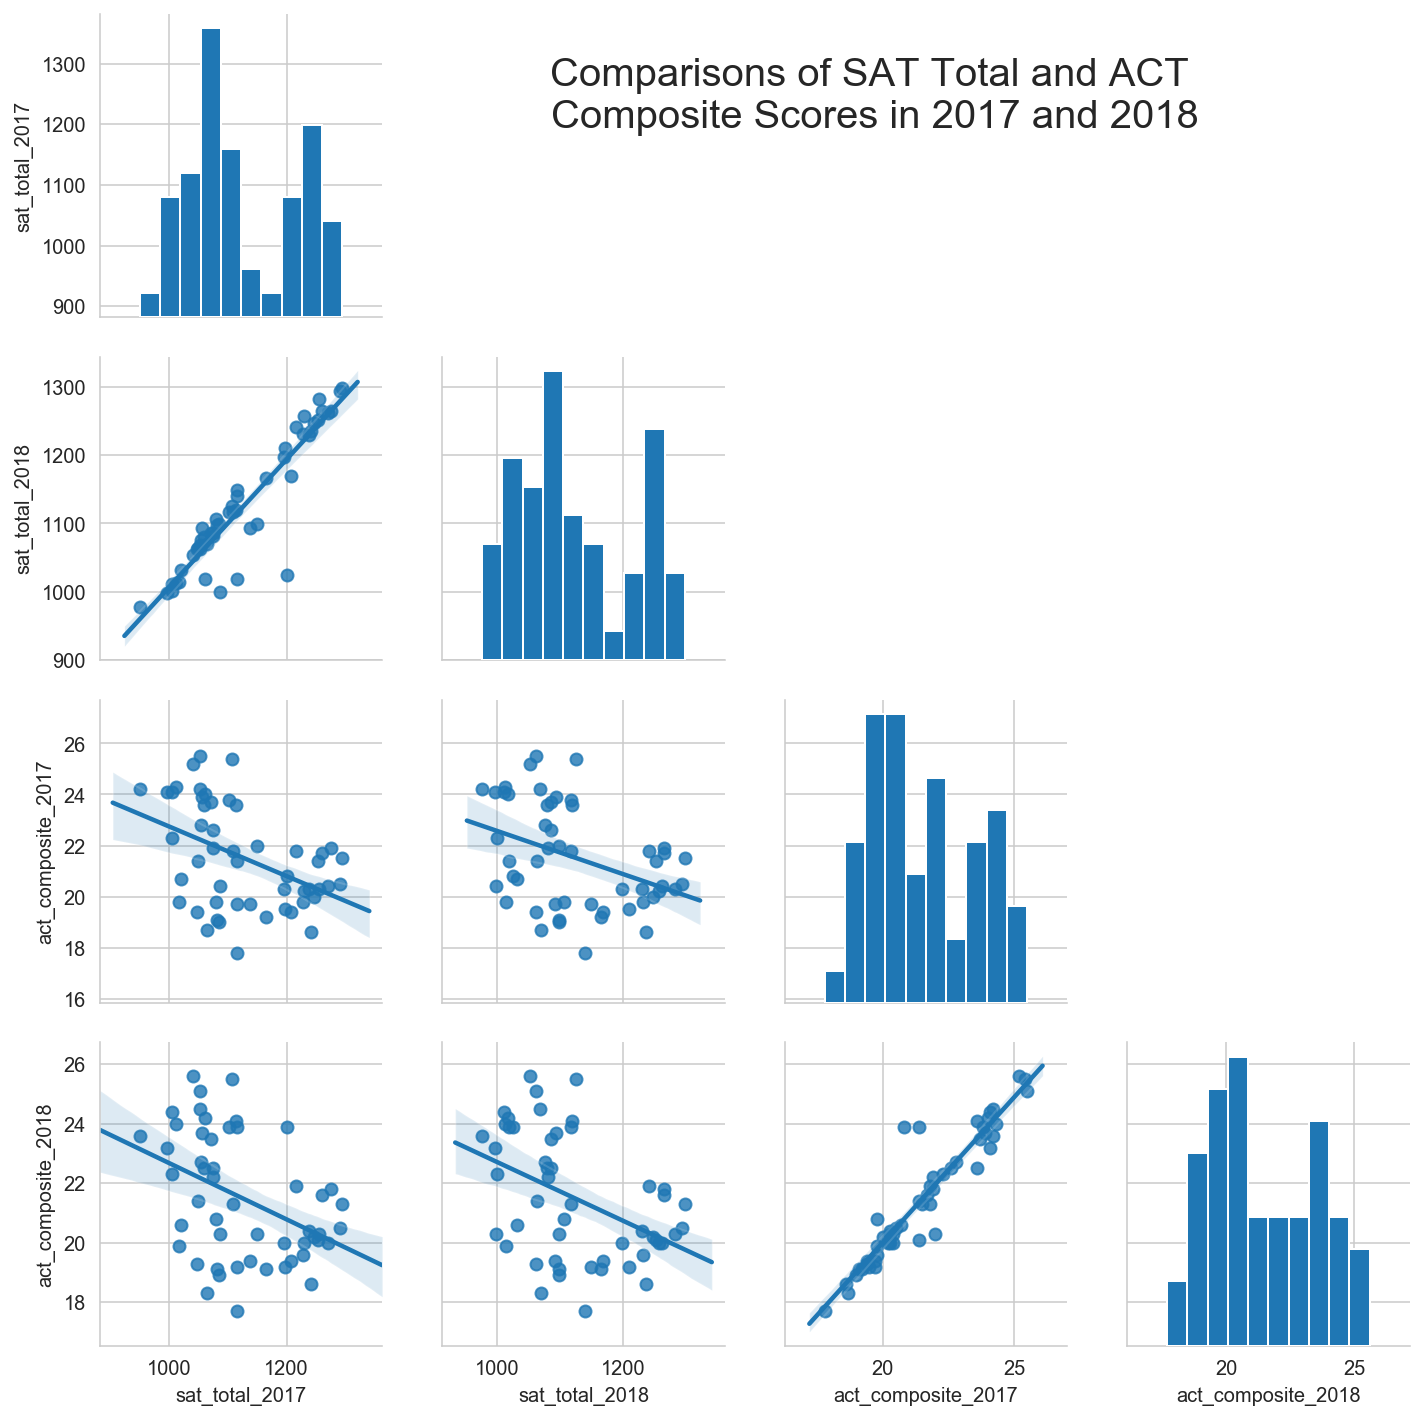

In [72]:
#plot pairwise comparison of scatter plots, with regression line
g = sns.pairplot(data_final[['sat_total_2017','sat_total_2018','act_composite_2017','act_composite_2018']],kind='reg') 
g.map_upper(hide_current_axis); #hide the top half as it is a mirror image
g.fig.suptitle("Comparisons of SAT Total and ACT \nComposite Scores in 2017 and 2018", x=0.6,y=0.95,fontsize='20');

#### Plotting boxplots to compare numeric fields

As boxplots are best used with values on the same scale, we build boxplots of the fields with similar scales.

##### Boxplots of percentage values

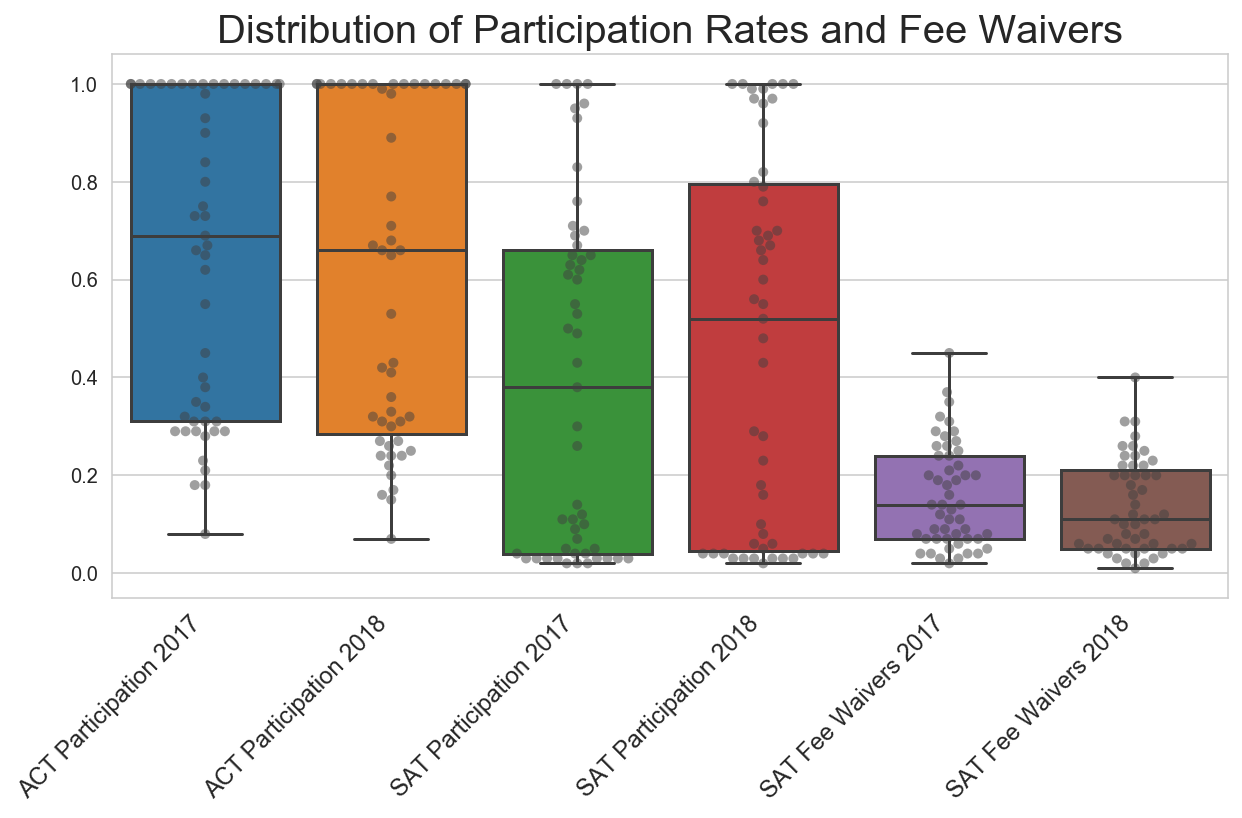

In [73]:
df = data_final[['act_participation_2017','act_participation_2018','sat_participation_2017','sat_participation_2018','sat_fee_waiver_2017','sat_fee_waiver_2018']]
fig, ax = plt.subplots(1,figsize=(10,5))
df.columns=['ACT Participation 2017','ACT Participation 2018','SAT Participation 2017','SAT Participation 2018',
           'SAT Fee Waivers 2017','SAT Fee Waivers 2018']
g = sns.boxplot(data = df);
h = sns.swarmplot(data = df, color="0.25", alpha="0.5");
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize='12');
g.set_title('Distribution of Participation Rates and Fee Waivers',fontsize='20');

##### Boxplots of SAT Scores

As SAT total scores are the math and reading scores combined, we scale the SAT Total Score by dividing it by a factor of 2.

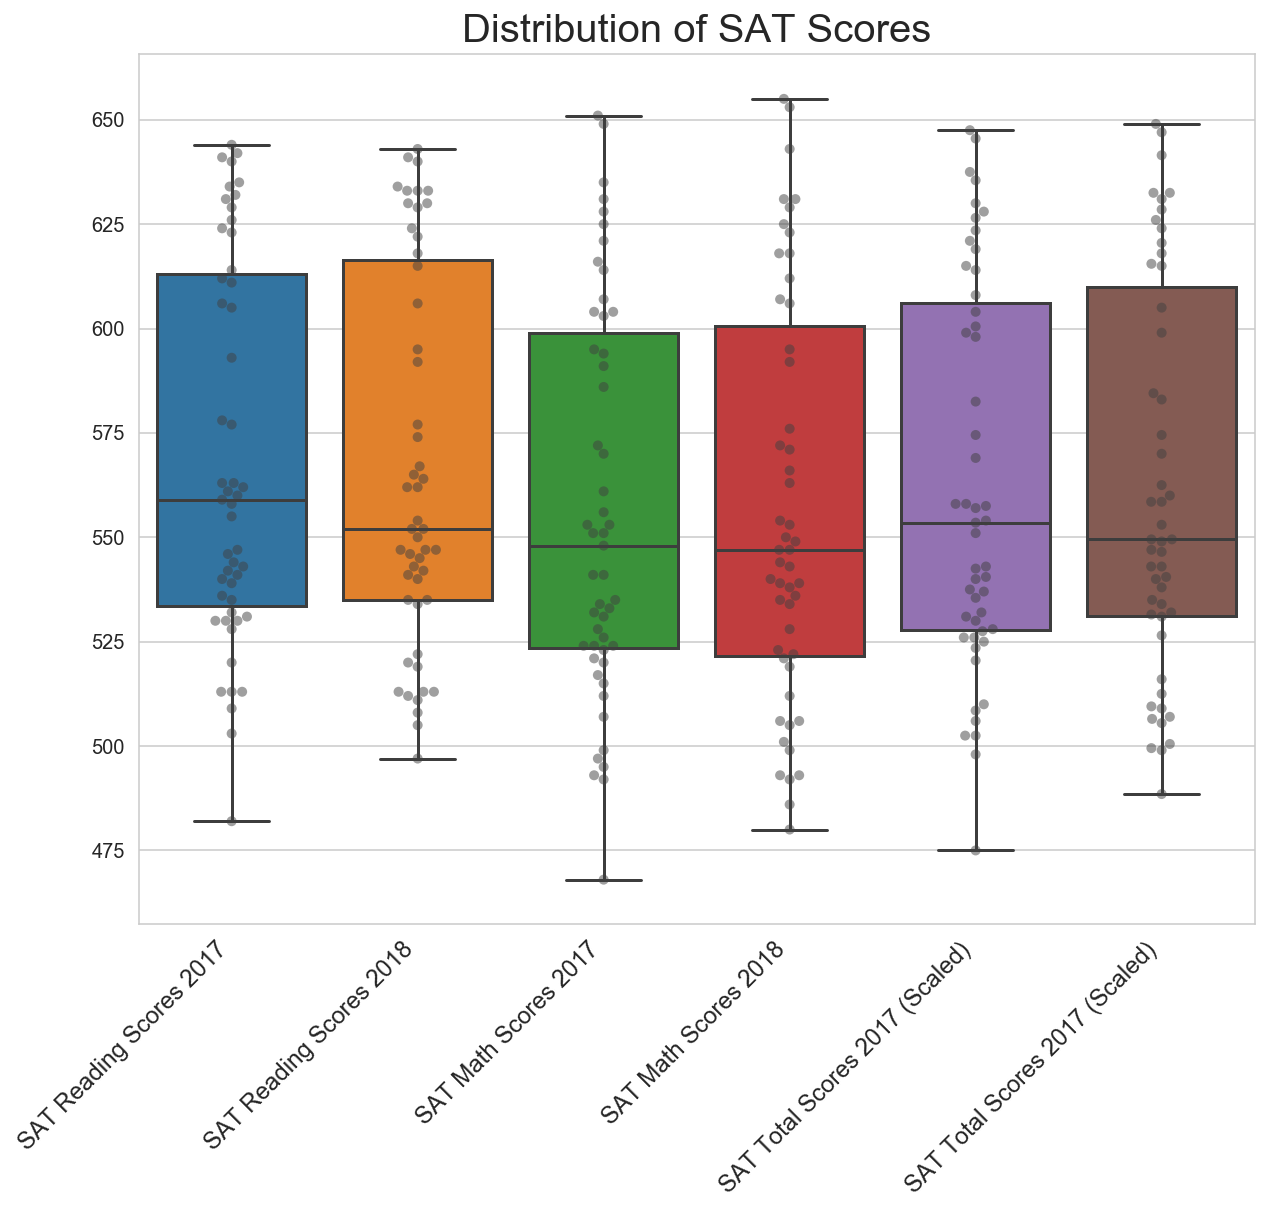

In [74]:
df = data_final[['sat_reading_2017','sat_reading_2018','sat_math_2017','sat_math_2018','sat_total_2017','sat_total_2018']].copy()#to remove setwithcopy warning
df.sat_total_2017 *= 0.5
df.sat_total_2018 *= 0.5
fig, ax = plt.subplots(1,figsize=(10,8)) 
g = sns.boxplot(data = df); #plot boxplots with data
h = sns.swarmplot(data = df, color="0.25", alpha="0.5"); #add data points
g.set_xticklabels(['SAT Reading Scores 2017','SAT Reading Scores 2018','SAT Math Scores 2017','SAT Math Scores 2018',
           'SAT Total Scores 2017 (Scaled)','SAT Total Scores 2017 (Scaled)'],rotation=45,horizontalalignment='right',fontsize='12'); #edit labels
g.set_title('Distribution of SAT Scores',fontsize='20'); #add title

##### Boxplots of ACT Scores

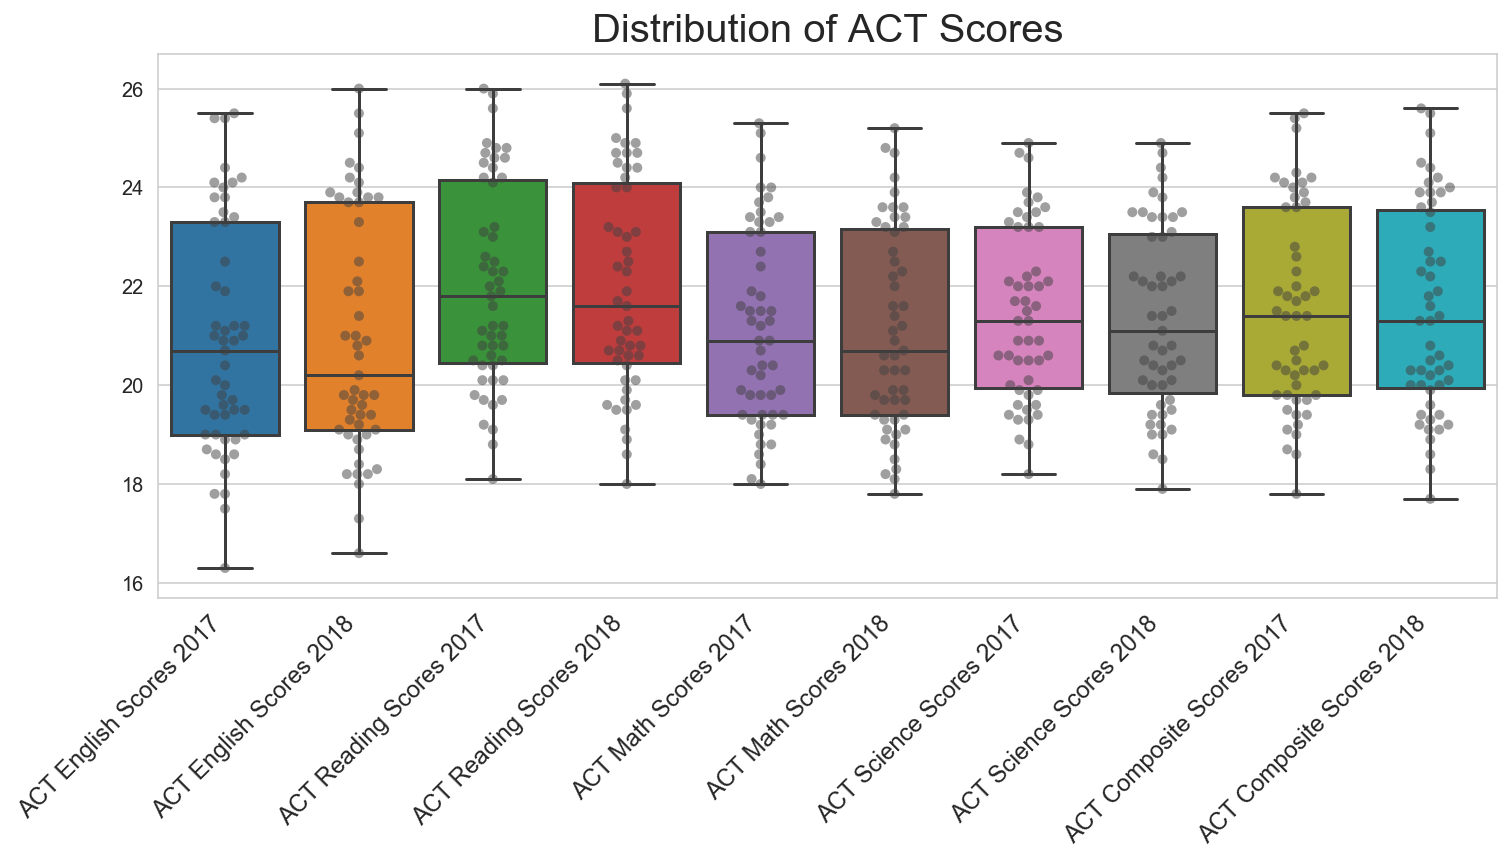

In [75]:
df = data_final[['act_eng_2017','act_eng_2018','act_reading_2017','act_reading_2018','act_math_2017','act_math_2018',
                 'act_science_2017','act_science_2018','act_composite_2017','act_composite_2018']]
df.columns=['ACT English Scores 2017','ACT English Scores 2018','ACT Reading Scores 2017','ACT Reading Scores 2018',
           'ACT Math Scores 2017','ACT Math Scores 2018','ACT Science Scores 2017','ACT Science Scores 2018',
           'ACT Composite Scores 2017','ACT Composite Scores 2018']
fig, ax = plt.subplots(1,figsize=(12,5))
g = sns.boxplot(data = df);
h = sns.swarmplot(data = df, color="0.25", alpha="0.5");
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize='12');
g.set_title('Distribution of ACT Scores',fontsize='20');

#### Socio-economic Factors and Political Interests

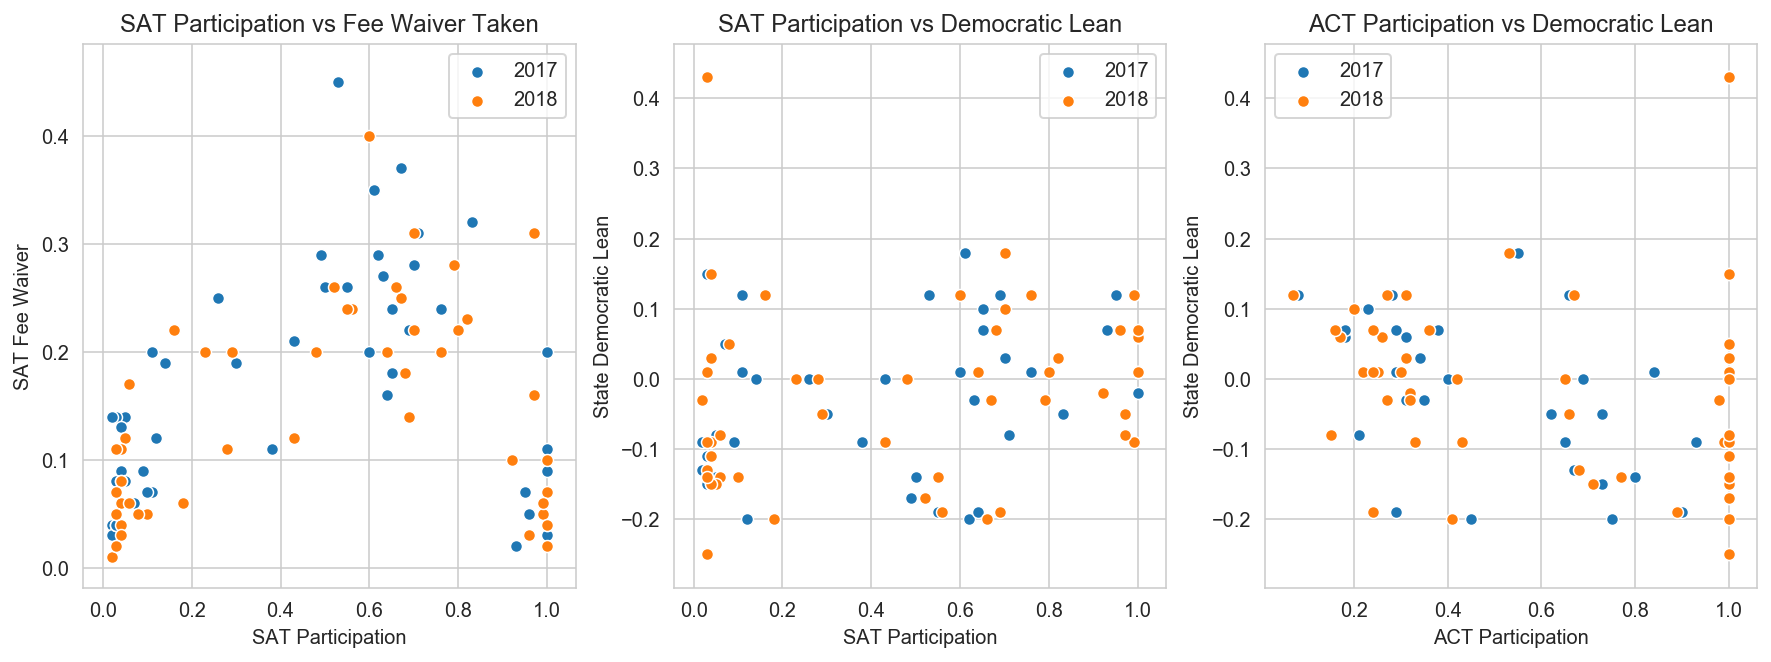

In [76]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

#plot scatterplot on first subplot of fee waiver against SAT participation rates
sns.scatterplot(x= 'sat_participation_2017',y='sat_fee_waiver_2017',data=data_final, ax=ax[0], label='2017');
sns.scatterplot(x= 'sat_participation_2018',y='sat_fee_waiver_2018',data=data_final, ax=ax[0], label='2018');
ax[0].set_xlabel('SAT Participation');
ax[0].set_ylabel('SAT Fee Waiver');
ax[0].set_title('SAT Participation vs Fee Waiver Taken');

#plot scatterplot on second subplot of political party lean against SAT participation rates
sns.scatterplot(x= 'sat_participation_2017',y='partisanship_lean',data=data_final, ax=ax[1], label='2017');
sns.scatterplot(x= 'sat_participation_2018',y='partisanship_lean',data=data_final, ax=ax[1], label='2018');
ax[1].set_xlabel('SAT Participation');
ax[1].set_ylabel('State Democratic Lean');
ax[1].set_title('SAT Participation vs Democratic Lean');

#plot scatterplot on second subplot of political party lean against SAT participation rates
sns.scatterplot(x= 'act_participation_2017',y='partisanship_lean',data=data_final, ax=ax[2], label='2017');
sns.scatterplot(x= 'act_participation_2018',y='partisanship_lean',data=data_final, ax=ax[2], label='2018');
ax[2].set_xlabel('ACT Participation');
ax[2].set_ylabel('State Democratic Lean');
ax[2].set_title('ACT Participation vs Democratic Lean');

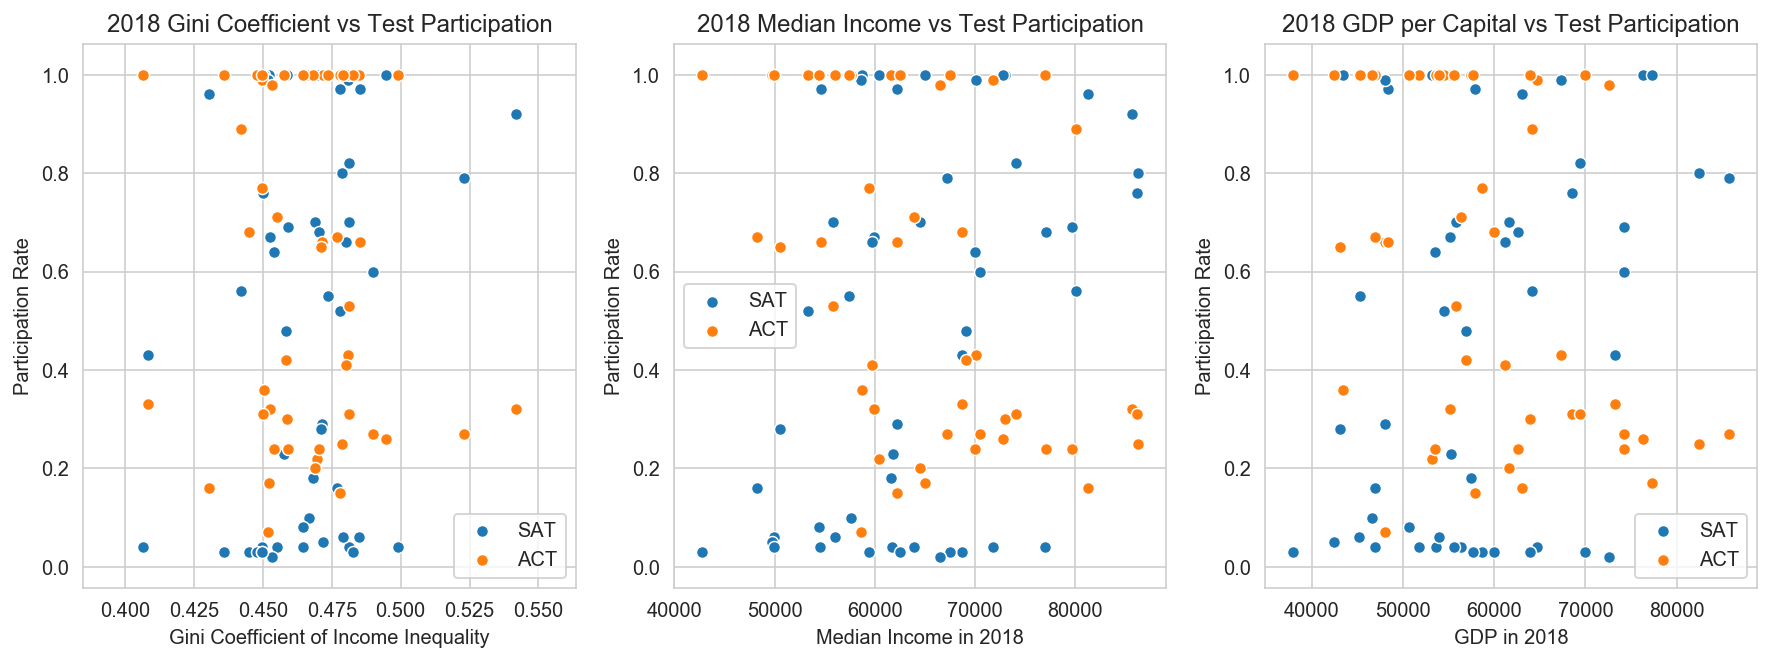

In [77]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x='gini_ineq',y='sat_participation_2018',data=data_final,ax=ax[0],label='SAT');
sns.scatterplot(x='gini_ineq',y='act_participation_2018',data=data_final,ax=ax[0],label='ACT');
ax[0].set_xlabel('Gini Coefficient of Income Inequality');
ax[0].set_ylabel('Participation Rate');
ax[0].set_title('2018 Gini Coefficient vs Test Participation');
sns.scatterplot(x='median_income_2018',y='sat_participation_2018',data=data_final,ax=ax[1],label='SAT');
sns.scatterplot(x='median_income_2018',y='act_participation_2018',data=data_final,ax=ax[1],label='ACT');
ax[1].set_xlabel('Median Income in 2018');
ax[1].set_ylabel('Participation Rate');
ax[1].set_title('2018 Median Income vs Test Participation');
sns.scatterplot(x='gdp_per_capita',y='sat_participation_2018',data=data_final.drop(data_final[data_final.state=='District of Columbia'].index,axis=0),ax=ax[2],label='SAT');
sns.scatterplot(x='gdp_per_capita',y='act_participation_2018',data=data_final.drop(data_final[data_final.state=='District of Columbia'].index,axis=0),ax=ax[2],label='ACT');
ax[2].set_xlabel('GDP in 2018');
ax[2].set_ylabel('Participation Rate');
ax[2].set_title('2018 GDP per Capital vs Test Participation');

#### Mapping SAT and ACT Participation Rates

In [78]:
#Define a function to plot maps
def subplot_map(geodataframe, columns, titles, colors):
    nrows = int(np.ceil(len(columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,8)) # subplot figure size
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns): # Gives an index value to get into all our lists
        #plot a map with a geodataframe with the columns as color variable
        geodataframe.plot(column=columns[i],cmap=colors,linewidth=0.8,ax=ax[i],edgecolor='0.8') 
        #set color bar legend
        sm = plt.cm.ScalarMappable(cmap=colors,norm=plt.Normalize(vmin=min(geodataframe[columns[i]]),vmax=max(geodataframe[columns[i]])))
        cbar=fig.colorbar(sm,cax = make_axes_locatable(ax[i]).append_axes("right",size='3%',pad=0.05)) 
        ax[i].set_title(titles[i],fontdict={'fontsize':'18'})# Set title for each subplot
        ax[i].axis('off') #turn off axis for each subplot
        geodataframe.apply(lambda x: ax[i].annotate(s=x.state_abbr, xy=x.geometry.centroid.coords[0], ha='center',fontsize='6'),axis=1);

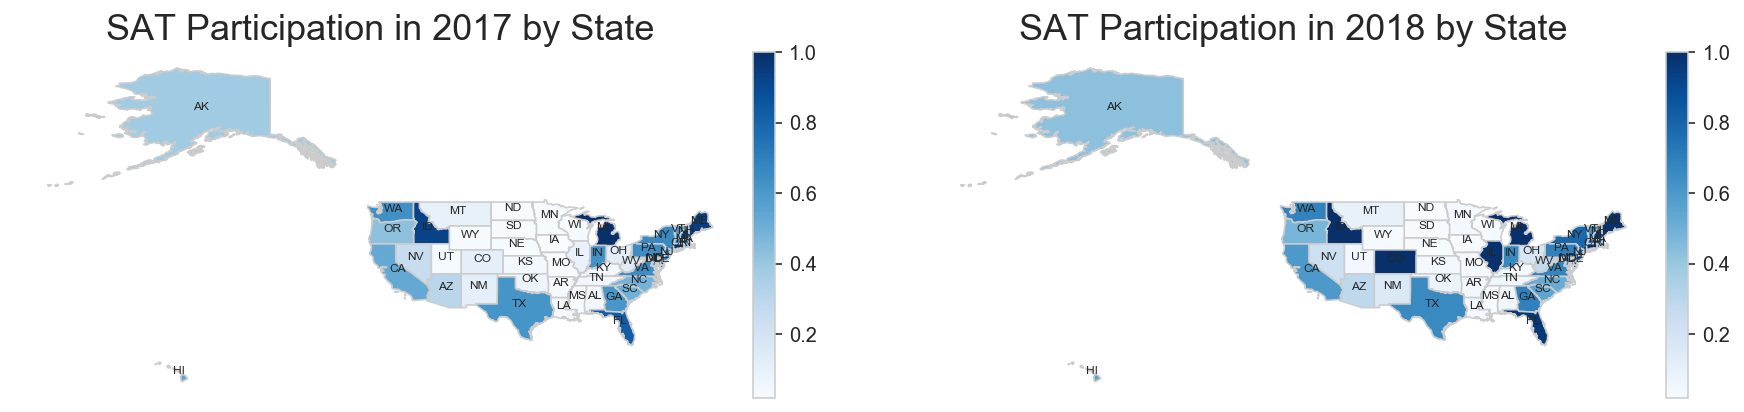

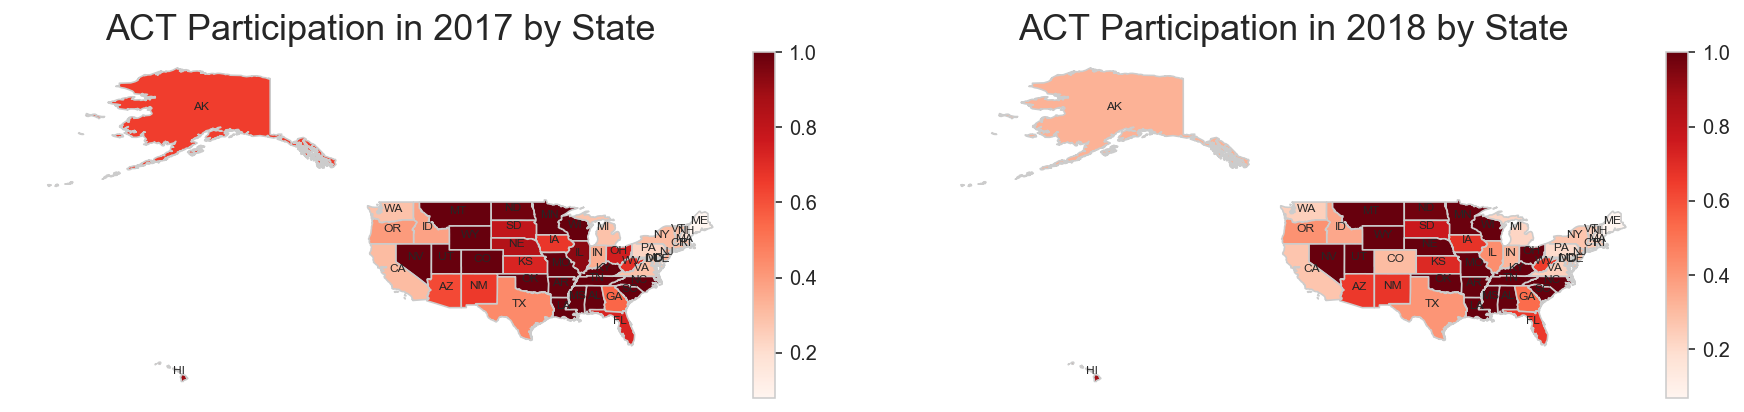

In [79]:
#plot the maps
subplot_map(usa,['sat_participation_2017','sat_participation_2018'],['SAT Participation in 2017 by State','SAT Participation in 2018 by State'],'Blues')
subplot_map(usa,['act_participation_2017','act_participation_2018'],['ACT Participation in 2017 by State','ACT Participation in 2018 by State'],'Reds')

#### Mapping SAT and ACT Total Scores

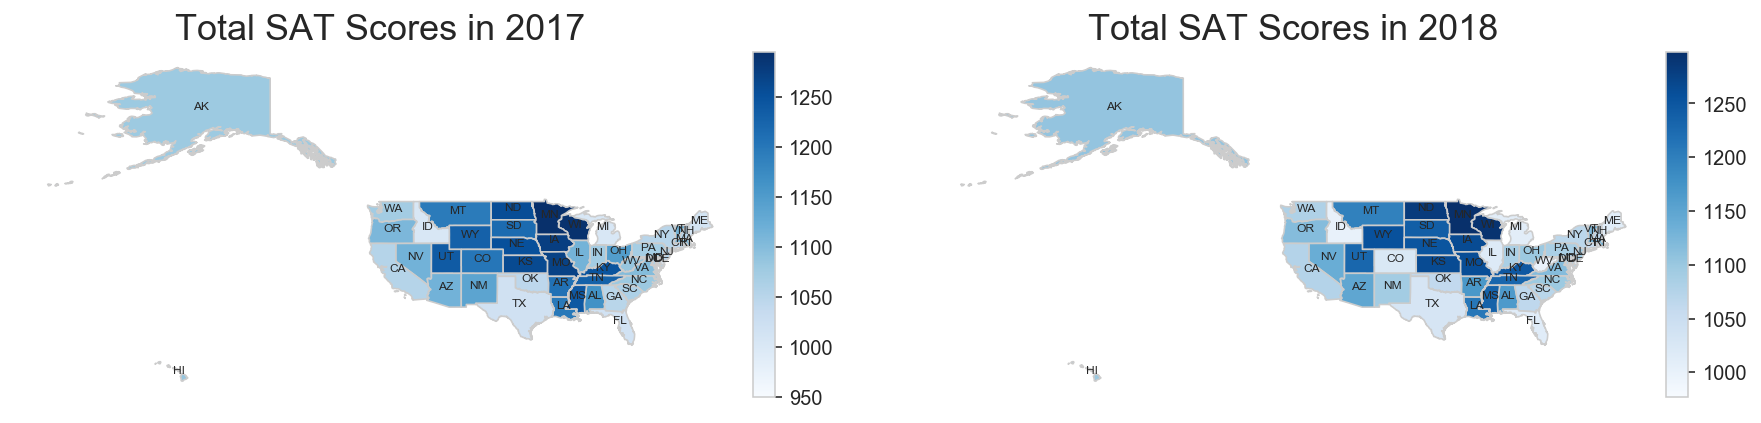

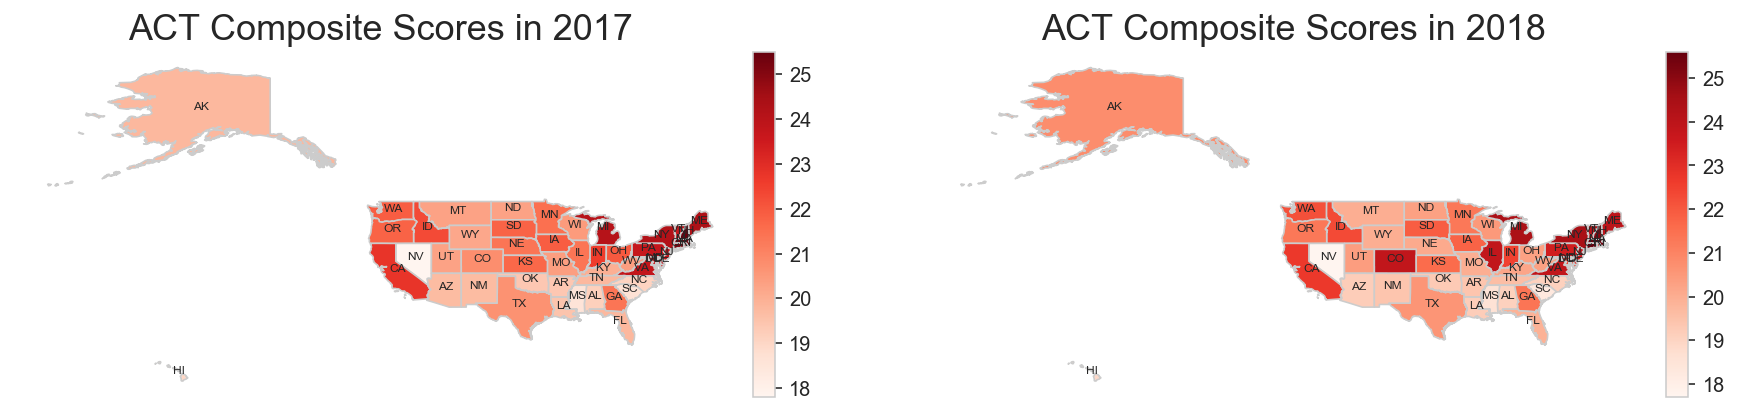

In [80]:
#plot maps
subplot_map(usa,['sat_total_2017','sat_total_2018'],['Total SAT Scores in 2017','Total SAT Scores in 2018'],'Blues')
subplot_map(usa,['act_composite_2017','act_composite_2018'],['ACT Composite Scores in 2017','ACT Composite Scores in 2018'],'Reds')

#### Changes in Participation Rates between 2017 and 2018

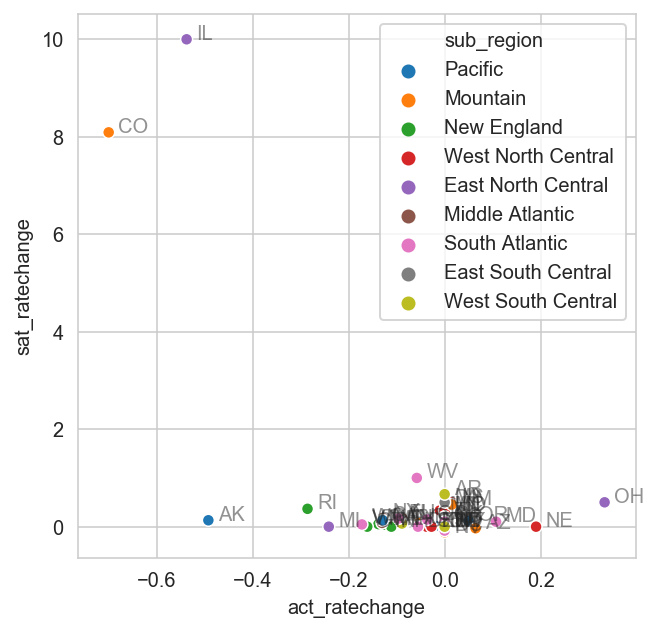

In [81]:
#define a function to show labels
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']),alpha=0.5)
#scatter plot of act_ratechange against sat_ratechange
fig, ax = plt.subplots(1, figsize=(5,5))
sns.scatterplot(x='act_ratechange',y='sat_ratechange', hue='sub_region',data=usa,ax=ax);
label_point(usa.act_ratechange, usa.sat_ratechange, usa.state_abbr, plt.gca())

## Descriptive and Inferential Statistics

#### Summarizing Distributions

##### 1. Measures of Central Tendency
The mean of the all the score variables in the ACT data are around 21 for both years. The mean score of the component SAT tests are between 555 and 570 and the mean of the SAT total scores are around 1125. None of the score variables have a difference between the mean and median of more than 4%. The participation variables, on the other hand, have somewhat larger differences between the mean and the median (at least 5%). The mean participation rate of the SAT is about 40-46%, while the mean participation rate of the ACT is higher at 60-65%.

##### 2. Spread
The standard deviations of ACT scores range between 1.7 and 2.5. The standard deviations of SAT component and total scores are approximately 45 to 48 and 92 to 93 respectively. The standard deviations of the SAT and ACT participation rates are between 0.32 and 0.38. 

The coefficients of variance (i.e. the standard deviation as ratio of the the mean), show that the most of the score variables have coefficients of less than 10%, with the exception of ACT English Scores (11%). This is not the case for participation rates, which have coefficients of 50-55% for ACT participation and at least 80% for SAT participation. However, based on the boxplots above, none of the variables have outliers (i.e. more than Q3+1.5IQR or less than Q1-1.5IQR).

##### 1. Shape and Skew

Based on the mean and standard deviation, as well as the distributions of the histograms and boxplots, the data does not suggest significant skew for any of the variables. However, the shapes of the distributions for participation rates tend towards the extreme ends for participation rates and have two peaks for the score variables. Thus, the data tends towards a non-symmetric bi-modal distributions.

In [82]:
descriptive_stats['mean_median_diff'] = (descriptive_stats['mean'] - descriptive_stats['50%'])/descriptive_stats['mean']
descriptive_stats['coeff_var']=descriptive_stats['std']/descriptive_stats['mean']
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,mean_median_diff,coeff_var
act_participation_2017,51.0,0.652549,0.321408,0.080000,0.310000,0.690000,1.0000,1.000000,-0.057392,0.492543
act_eng_2017,51.0,20.931373,2.353677,16.300000,19.000000,20.700000,23.3000,25.500000,0.011054,0.112447
act_math_2017,51.0,21.182353,1.981989,18.000000,19.400000,20.900000,23.1000,25.300000,0.013330,0.093568
act_reading_2017,51.0,22.013725,2.067271,18.100000,20.450000,21.800000,24.1500,26.000000,0.009709,0.093908
act_science_2017,51.0,21.450980,1.739353,18.200000,19.950000,21.300000,23.2000,24.900000,0.007038,0.081085
act_composite_2017,51.0,21.519608,2.020695,17.800000,19.800000,21.400000,23.6000,25.500000,0.005558,0.093900
sat_participation_2017,51.0,0.398039,0.352766,0.020000,0.040000,0.380000,0.6600,1.000000,0.045320,0.886260
sat_reading_2017,51.0,569.117647,45.666901,482.000000,533.500000,559.000000,613.0000,644.000000,0.017778,0.080242
sat_math_2017,51.0,556.882353,47.121395,468.000000,523.500000,548.000000,599.0000,651.000000,0.015950,0.084616
sat_total_2017,51.0,1126.098039,92.494812,950.000000,1055.500000,1107.000000,1212.0000,1295.000000,0.016959,0.082137


#### Assumption of Normal Distribution in Sampling Population

As most of the variables in the data do not seem to have a unimodal distribution, it is difficult to be sure that the sampling distribution is normally distributed. We adapt a function below to use the [Shapiro-Wilk test for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) from the scipy.stats library. According to this test, most of the variables available are not normally distributed, with the possible exception of ACT Reading Scores for 2017, ACT Science Scores for 2017 and ACT Science Scores for 2018.

However, we should also consider that the scores for each state is an average. If we take each state to be a sample, we have the mean of 51 samples. Within the US student populations, the [ACT](https://blog.prepscholar.com/what-is-a-good-act-score-a-bad-act-score-an-excellent-act-score) and [SAT](https://blog.prepscholar.com/sat-standard-deviation) scores are normally distributed by design. Although the reports from SAT do not give the standard deviation, a distribution of the percentages of students scores in 2019 below show that it is likely to be a normal distribution. According to central limit theorem, if the population is normal, then sampling distribution of the sample means will be approximately normal.

<img src="images/SAT_score_distribution_2019.png" alt="SAT Score Distribution" style="width: 200px;"/>

However, because of the differences in participation rates, we have to be careful when using parametric tests requiring normality. States with low participation rates may have stronger performing students who choose to take the tests, causing selection bias. Comparing scores between states with similar participation rates may yield better results.  

In [85]:
def check_norm_shapiro(lst, alpha = 0.05):
    stat, p = shapiro(lst) #call function from scipy.stats
    if p > alpha: # Null hypothesis for Shapiro-Wilk test is that the sample comes from a Normal distribution
        return 'Gaussian', stat, p #If the p value is more than alpha, we fail to reject H0
    else:
        return 'Not Gaussian', stat, p #Else, we reject H0

data_final.drop(['state','state_abbr'],axis=1).apply(check_norm_shapiro)

act_participation_2017    (Not Gaussian, 0.8398398160934448, 6.978356395...
act_eng_2017              (Not Gaussian, 0.9486982822418213, 0.027822066...
act_math_2017             (Not Gaussian, 0.9527901411056519, 0.041251927...
act_reading_2017          (Gaussian, 0.9556081295013428, 0.0542547069489...
act_science_2017          (Gaussian, 0.9631470441818237, 0.1136119589209...
act_composite_2017        (Not Gaussian, 0.9499146938323975, 0.031260922...
sat_participation_2017    (Not Gaussian, 0.8536624908447266, 1.649148543...
sat_reading_2017          (Not Gaussian, 0.9205631613731384, 0.002204112...
sat_math_2017             (Not Gaussian, 0.9493667483329773, 0.029660360...
sat_total_2017            (Not Gaussian, 0.9359505772590637, 0.008477959...
sat_fee_waiver_2017       (Not Gaussian, 0.9286421537399292, 0.004417602...
act_participation_2018    (Not Gaussian, 0.8256993889808655, 3.017099288...
act_eng_2018              (Not Gaussian, 0.9341006278991699, 0.007173449...
act_math_201

#### Estimate Limits of Data

If we want to understand the relationship between SAT and ACT participation rates in 2017, we need to understand what types of statistical inferences can be made with the type of data that we have.

##### Conducting statistical inferences on SAT and ACT participation rates? 

Participation rates is obtained from the percentages of high school students in a particular year taking the SAT or the ACT. Given the large difference in populations between states (e.g. Alaska had 7,796 graduating high school students in 2018 while California had 435,365), states with a smaller population would see larger impacts in the change in the numbers of students participating. Thus, the participation rates can vary significantly for such states. Since we cannot assume normal distributions for participation rates, we have to be careful when using tests that require normality. We may be able to use non-parametric tests instead, if it can account for the limits of the type of information. 

##### Comparing SAT and ACT math scores? 

To first compare the SAT and ACT math scores, we should be aware of the [differences in testing](https://blog.collegevine.com/difference-sat-act-math/) to understand what the tests mean and what specifically we are testing for. ACT math tests, for example are purely multiple choice, while SAT math tests include response sections. This could lead to different types of students preferring different testing methods. As the scores are derived differently, we should be careful of how we compare them. Some tests [may require scaling for accurate results](http://benalexkeen.com/feature-scaling-with-scikit-learn/). An example of a scaled kernel density plot is shown below.

In [86]:
scaled_df = data_final[['sat_math_2017', 'act_math_2017', 'sat_math_2018','act_math_2018']] #filter relevant columns
scaler = preprocessing.MinMaxScaler() #call the function from sklearn
scaled_df = scaler.fit_transform(scaled_df) #scale the dataframe, which returns a numpy array
scaled_df = pd.DataFrame(scaled_df, columns=['sat_math_2017', 'act_math_2017', 'sat_math_2018','act_math_2018'])
scaled_df.head()

,sat_math_2017,act_math_2017,sat_math_2018,act_math_2018
0,0.568306,0.054795,0.520000,0.067568
1,0.355191,0.246575,0.365714,0.378378
2,0.464481,0.246575,0.525714,0.216216
3,0.688525,0.136986,0.548571,0.148649
4,0.306011,0.643836,0.320000,0.635135


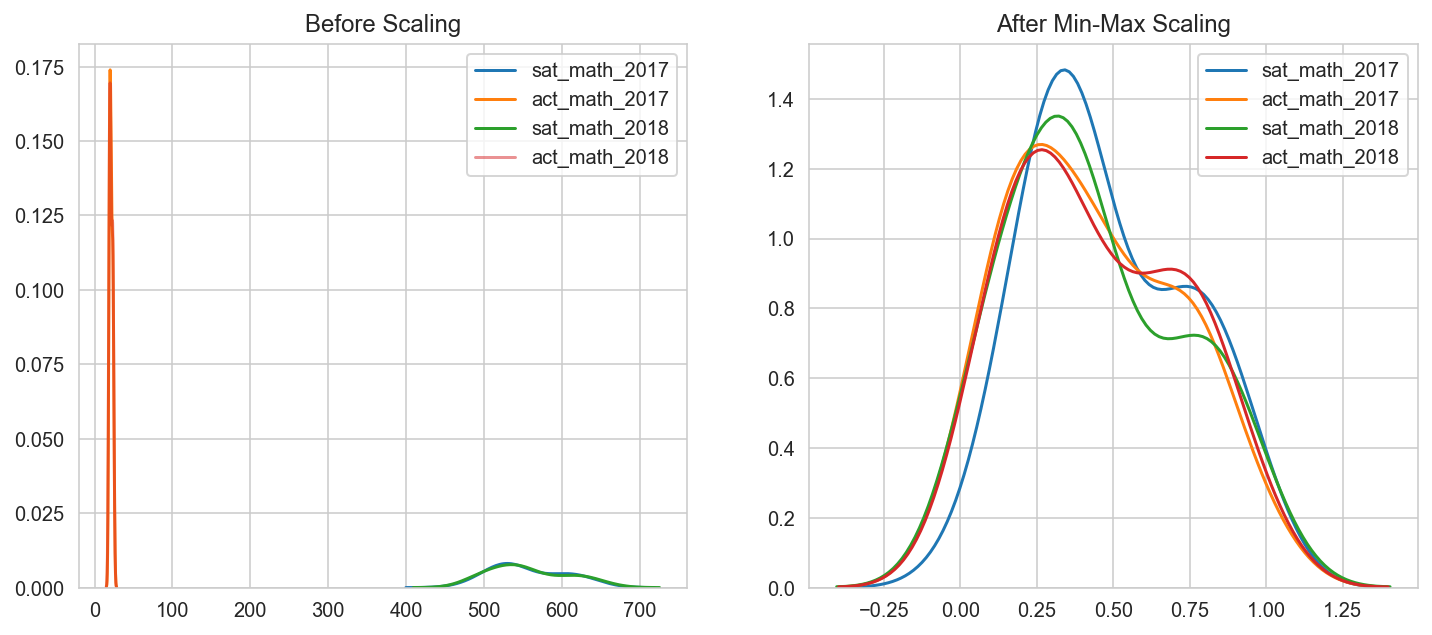

In [87]:
#plot the kernal density estimate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(data_final['sat_math_2017'], ax=ax1)
sns.kdeplot(data_final['act_math_2017'], ax=ax1)
sns.kdeplot(data_final['sat_math_2018'], ax=ax1)
sns.kdeplot(data_final['act_math_2018'], ax=ax1,alpha=0.5)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['sat_math_2017'], ax=ax2)
sns.kdeplot(scaled_df['act_math_2017'], ax=ax2)
sns.kdeplot(scaled_df['sat_math_2018'], ax=ax2)
sns.kdeplot(scaled_df['act_math_2018'], ax=ax2)
plt.show()

#### Statistical Evaluation of Distributions 

Since we cannot assume the data is normally distributed for most of the variables, we cannot perform tests that require normality with the exception of ACT Science scores in 2017 and 2018 and ACT Reading scores in 2017. We run T-Tests on two sets of data:

- A two sample independent T-Test on ACT Reading 2017 vs ACT Science 2017
- A paired sample T-Test on ACT Science 2017 vs ACT Science 2018 as we cannot assume the scores are independent

In [88]:
print("ACT 2017 Scores, Science vs Reading: ",stats.ttest_ind(data_final['act_science_2017'], data_final['act_reading_2017']))
print("As p <0.5, we reject the null hypothesis;\nThere is likely to be a difference between the ACT Science and Reading scores for 2017.")
print("ACT Science 2017 vs 2018: ",stats.ttest_rel(data_final['act_science_2017'], data_final['act_science_2018']))
print("As p <0.5, we reject the null hypothesis;\nThere is likely to be a difference between the ACT Science scores for 2017 and 2018.")

ACT 2017 Scores, Science vs Reading:  Ttest_indResult(statistic=-1.48753231889328, pvalue=0.14002079556294633)
As p <0.5, we reject the null hypothesis;
There is likely to be a difference between the ACT Science and Reading scores for 2017.
ACT Science 2017 vs 2018:  Ttest_relResult(statistic=1.1783766072743609, pvalue=0.24422429603804788)
As p <0.5, we reject the null hypothesis;
There is likely to be a difference between the ACT Science scores for 2017 and 2018.


## Observations

As mentioned previously, Colorado saw a large increase in participation rate for SAT, in conjunction with a large decrease in participation rate for ACT due to policy changes. According to the scatterplot comparing the proportional change in ACT and SAT participations, Illinois also had a change trajectory similar to Colorado's, which was also due to [changes in the state's policies and contracts](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) with the College Board and the ACT.

Among the states who saw an increase in ACT participation rates, Ohio stands out as also having an increase in SAT participation rates. This is also because of [state legislative moves](https://www.ohiohighered.org/sites/ohiohighered.org/files/uploads/math/OH%20New%20HS%20Grad%20Requirements.pdf) to make either the ACT or SAT a graduation requirement.

In [89]:
#show proportion change in ACT participation rate
data_final.sort_values('act_ratechange',ascending=False)[['state','act_participation_2017','act_participation_2018','sat_participation_2017','sat_participation_2018','act_ratechange','sat_ratechange']].head()

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018,act_ratechange,sat_ratechange
35,Ohio,0.75,1.00,0.12,0.18,0.333333,0.500000
27,Nebraska,0.84,1.00,0.03,0.03,0.190476,0.000000
20,Maryland,0.28,0.31,0.69,0.76,0.107143,0.101449
2,Arizona,0.62,0.66,0.30,0.29,0.064516,-0.033333
37,Oregon,0.40,0.42,0.43,0.48,0.050000,0.116279


A number of states require students to take the ACT, the SAT or either one. We can also use [this information](https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/) to group the states to see show the differences in participation rates. First, we map the states by whether they have graduation requirements for the SAT or ACT.

In [90]:
#create list with information of the state requirements
require_act = ['Alabama','Hawaii','Kentucky','Louisiana','Mississippi','Missouri','Montana','Nebraska',
               'Nevada','North Carolina','South Carolina','Utah','Wisconsin','Wyoming']
require_sat = ['Colorado','Connecticut','Delaware','District of Columbia','Illinois','Maine','Michigan','New Hampshire']
require_either = ['Idaho','Ohio','Tennessee']

#define function to map the data
def grad_requirement(x):
    if x in require_act:
        return 'ACT'
    elif x in require_sat:
        return 'SAT'
    elif x in require_either:
        return 'Either'
    else:
        return 'Neither'

In [91]:
data_final['require'] = data_final.state.apply(grad_requirement) #call the function
data_final.head()

,state,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_reading_2017,sat_math_2017,...,sat_fee_waiver_2018,act_ratechange,sat_ratechange,median_income_2018,median_income_2017,gdp_per_capita,gini_ineq,partisanship_lean,state_abbr,require
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,0.17,0.000000,0.200000,49936,52359,45219,0.4847,-0.14,AL,ACT
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.12,-0.492308,0.131579,68734,73992,73205,0.4081,-0.09,AK,Neither
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.20,0.064516,-0.033333,62283,62615,48055,0.4713,-0.05,AZ,Neither
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,0.12,0.000000,0.666667,49781,50019,42454,0.4719,-0.15,AR,Neither
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.40,-0.129032,0.132075,70489,71459,74205,0.4899,0.12,CA,Neither


In the scatterplot below, we can see that among states without a requirement for either the SAT or the ACT, there's a large cluster with above average participation in SAT and another cluster tending towards the ACT.

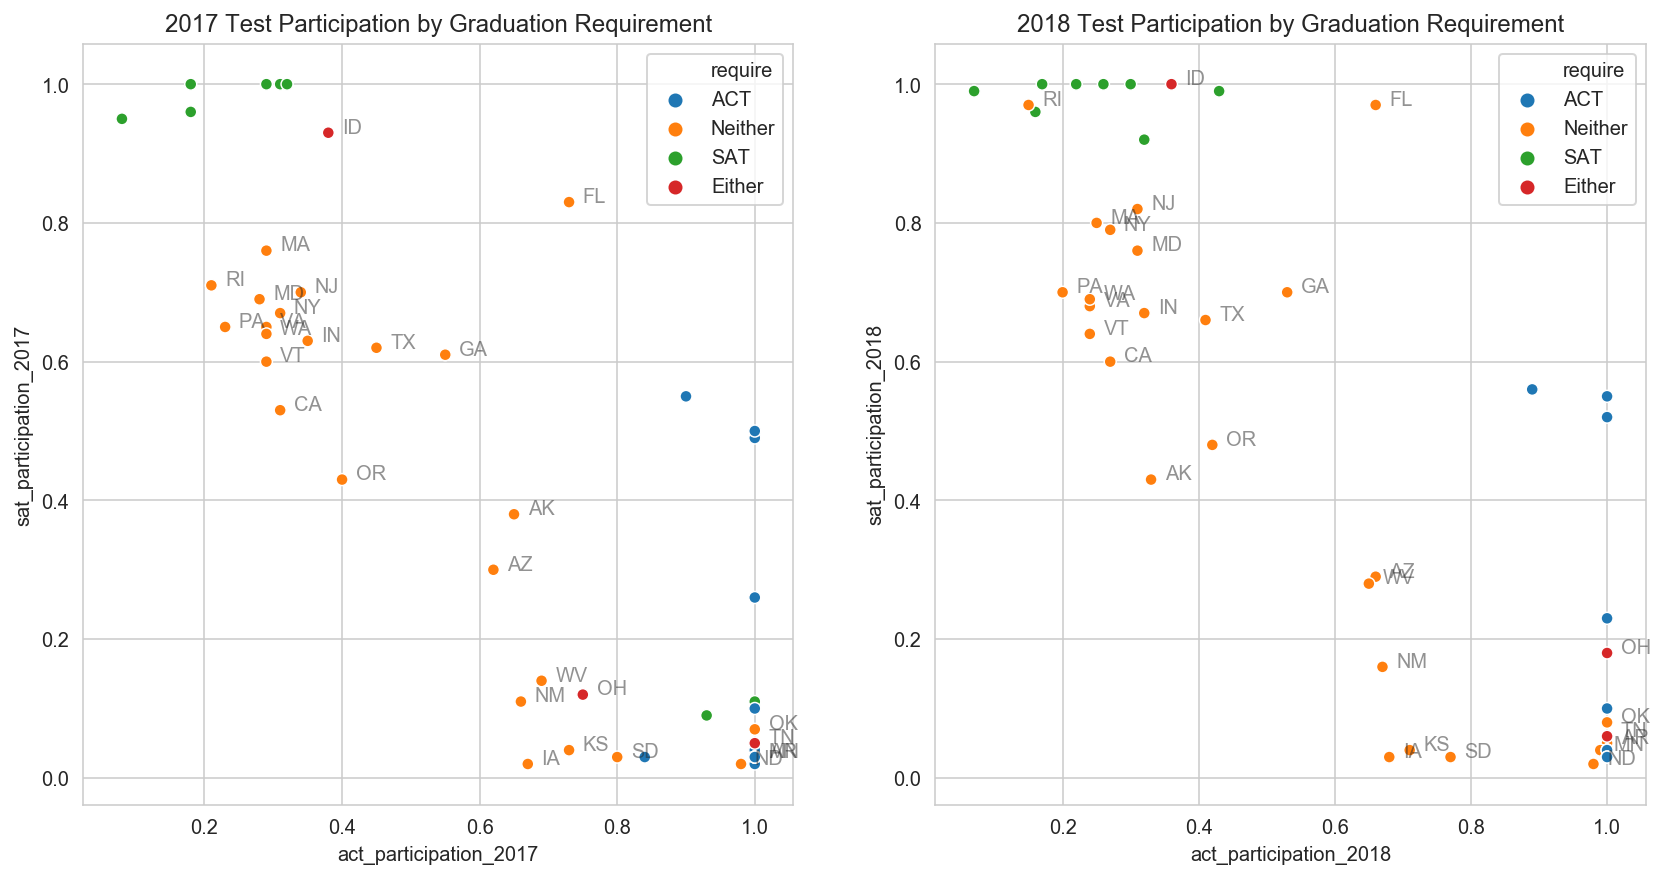

In [92]:
#scatter plot of act_ratechange against sat_ratechange
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,7))
sns.scatterplot(x='act_participation_2017',y='sat_participation_2017', hue='require',data=data_final,ax=ax1);
ax1.set_title('2017 Test Participation by Graduation Requirement')
label_point(data_final[data_final.require=='Either'].act_participation_2017, data_final[data_final.require=='Either'].sat_participation_2017, data_final[data_final.require=='Either'].state_abbr, ax1)
label_point(data_final[data_final.require=='Neither'].act_participation_2017, data_final[data_final.require=='Neither'].sat_participation_2017, data_final[data_final.require=='Neither'].state_abbr, ax1)
sns.scatterplot(x='act_participation_2018',y='sat_participation_2018', hue='require',data=data_final,ax=ax2);
ax2.set_title('2018 Test Participation by Graduation Requirement')
label_point(data_final[data_final.require=='Either'].act_participation_2018, data_final[data_final.require=='Either'].sat_participation_2018, data_final[data_final.require=='Either'].state_abbr, ax2)
label_point(data_final[data_final.require=='Neither'].act_participation_2018, data_final[data_final.require=='Neither'].sat_participation_2018, data_final[data_final.require=='Neither'].state_abbr, ax2)

## Conclusions and Recommendations

Based on the the exploration of the data, we have found that there seems to be an inverse relationship between SAT and ACT participation rates because of individual state policies. There is also an inverse relationship between scores and participation rate, likely due to selection bias.

Coincidentally the SAT participation rate is higher on both the coasts, and lower in the middle. This parallels the states' political lean, and the scatter plots of SAT particpation against political lean shows that there's a possible correlation between test participation and state voting patterns or party in power.

This does not necessarily mean that the parties favour either tests. Rather, there could be other conditions that increase the likelihood of test participation and influence political affiliation. For example, the distributions show a possible positive correlation between fee waivers taken and SAT participation rates. Thus, it's possible that students' financial situations play a part in their decisions on whether to take a test and which test to take. Although the tests themselves are affordable, the tutoring required for them is not. However, SAT participation rates do not seem to have significant correlation with the economic factors collected. They may require some form of binning or grouping to tease out the trends.

Based on the policy research available, it seems evident that the test participation rates for a number of states is dependent on the states education policies and contracts with either ACT Inc. or the College Board. States requiring high schoolers to take either test have a large influence on the participation rates, especially given that some colleges have stopped [requiring SAT or ACT scores for admission](https://hechingerreport.org/questioning-their-fairness-a-record-number-of-colleges-stop-requiring-the-sat-and-act/).

To increase participation rates in a state effectively, the state needs to not have an existing contract or graduation requirement for either the SAT or the ACT, have a low enough SAT participation rate for both SAT and ACT, ind icating potential areas of growth without a strong competitor. We believe that states such as California and Oregon fall into this category.

Other than the right state, we should also look into actively securing contracts with state governments and push for making SAT the statewide high school standardised test for graduates. As the states will want consistenting testing for their students, we should ensure that the tests themselves are rigorous and updated to the current curriculum requirements, in addition to [staying relevant to colleges that want to improve their diversity](https://www.edsurge.com/news/2019-07-31-don-t-call-them-test-companies-how-the-college-board-and-act-have-shifted-focus). We should also reform the tests as necessary, as ACT has been doing by allowing students to retake [test components instead of the entire test](https://www.insidehighered.com/admissions/article/2019/10/14/act-reforms-seen-giving-it-edge-vs-sat).